In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
trans=pd.read_csv("/content/drive/My Drive/transcation.csv")
df=pd.read_csv('/content/drive/My Drive/ieefraud_identity.csv')

In [4]:
trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C3,C5,C14,D1,D5,D15,M1,M2,M3,M4,M6,V1,V2,V4,V7,V9,V24,V26,V37,V47,V55,V67,V76,V78,V83,V87,V88,V89,V91,V95,V107,V108,V113,V116,V119,V122,V125,V281,V283,V284,V286,V287,V289,V292,V301,V304,V305,V311,V312,V315,V321
0,2987000,0,1,68.5,W,13926,321.0card2,150.0card3,discovercard4,142.0card5,creditcard6,315.0regions,87.0country,19.0,not_found_p_mailp_mail,0.0,0.0,1.0,14.0,-1.0,0.0,TM1,TM2,TM2M3,M2M4,TM6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2987001,0,1,29.0,W,2755,others_card2,150.0card3,mastercardcard4,102.0card5,creditcard6,325.0regions,87.0country,-1.0,gmail.comp_mail,0.0,0.0,1.0,0.0,-1.0,0.0,torfM1,torfM2,torfM2M3,M0M4,TM6,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2987002,0,1,59.0,W,4663,490.0card2,150.0card3,visacard4,166.0card5,debitcard6,330.0regions,87.0country,287.0,outlook.comp_mail,0.0,0.0,1.0,0.0,-1.0,315.0,TM1,TM2,TM2M3,M0M4,FM6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2987003,0,1,50.0,W,18132,others_card2,150.0card3,mastercardcard4,117.0card5,debitcard6,other_regions,87.0country,-1.0,yahoo.comp_mail,0.0,0.0,1.0,112.0,0.0,111.0,torfM1,torfM2,torfM2M3,M0M4,FM6,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,135.0,0.0,0.0
4,2987004,0,1,50.0,H,4497,514.0card2,150.0card3,mastercardcard4,102.0card5,creditcard6,other_regions,87.0country,-1.0,gmail.comp_mail,0.0,0.0,1.0,0.0,-1.0,800.0,torfM1,torfM2,torfM2M3,other_mM4,torfM6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df.head()

,TransactionID,id_01,id_02,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987004,0.0,70787.0,1.0,0.0,0.0,0.0,0.0,100.0,NotFoundid_12,other_id_13id_13,-480.0id_14,Newid_15,NotFoundid_16,166.0id_17,542.0id19id_19,others_id_20id_20,Newid28,NotFoundid29,Android 7.0id30,others_id_31,32.0id_32,others_id33,match_status:2id34,Tid_35,Fid_36,Tid_37,Tid_38,mobile
1,2987008,-5.0,98945.0,1.0,0.0,-5.0,0.0,0.0,100.0,NotFoundid_12,49.0id_13,-300.0id_14,Newid_15,NotFoundid_16,166.0id_17,others_id_19id_19,others_id_20id_20,Newid28,NotFoundid29,iOS 11.1.2id30,mobile safari 11.0id31,32.0id_32,1334x750id33,match_status:1id34,Tid_35,Fid_36,Fid_37,Tid_38,mobile
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFoundid_12,52.0id_13,missing_id_14id_14,Foundid_15,Foundid_16,others_id_17id_17,410.0id19id_19,others_id_20id_20,Foundid28,Foundid29,missing_id_30id30,chrome 62.0id31,othersid_32,othersid33,missing_id34id34,Fid_35,Fid_36,Tid_37,Tid_38,desktop
3,2987011,-5.0,221832.0,1.0,0.0,-6.0,0.0,0.0,100.0,NotFoundid_12,52.0id_13,missing_id_14id_14,Newid_15,NotFoundid_16,225.0id_17,others_id_19id_19,507.0id20id_20,Newid28,NotFoundid29,missing_id_30id30,chrome 62.0id31,othersid_32,othersid33,missing_id34id34,Fid_35,Fid_36,Tid_37,Tid_38,desktop
4,2987016,0.0,7460.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFoundid_12,other_id_13id_13,-300.0id_14,Foundid_15,Foundid_16,166.0id_17,529.0id19id_19,others_id_20id_20,Foundid28,Foundid29,others_id_30,chrome 62.0id31,24.0id_32,others_id33,match_status:2id34,Tid_35,Fid_36,Tid_37,Tid_38,desktop


In [6]:
trans=trans.merge(df,on='TransactionID')

In [7]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 94 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   144233 non-null  int64  
 1   isFraud         144233 non-null  int64  
 2   TransactionDT   144233 non-null  int64  
 3   TransactionAmt  144233 non-null  float64
 4   ProductCD       144233 non-null  object 
 5   card1           144233 non-null  int64  
 6   card2           144233 non-null  object 
 7   card3           144233 non-null  object 
 8   card4           144233 non-null  object 
 9   card5           144233 non-null  object 
 10  card6           144233 non-null  object 
 11  addr1           144233 non-null  object 
 12  addr2           144233 non-null  object 
 13  dist1           144233 non-null  float64
 14  P_emaildomain   144233 non-null  object 
 15  C3              144233 non-null  float64
 16  C5              144233 non-null  float64
 17  C14       

In [8]:
##transation.csv preprocessing I forgot about column V87
##so, its having those null values now

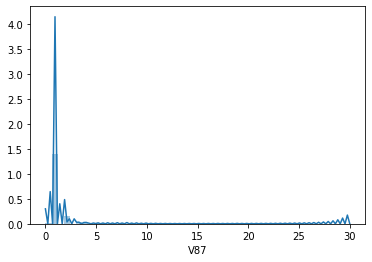

In [9]:
sn.distplot(trans['V87'])

In [10]:
trans['V87'].isna().sum()/trans.shape[0]

0.5266963870958796

In [11]:
trans['V87'].fillna(value=-1,inplace=True)

In [12]:
data=pd.DataFrame(trans['card1'].value_counts()/trans.shape[0])

In [13]:
data.head()

,card1
15885,0.066018
6019,0.031019
3154,0.029258
9633,0.025625
5812,0.017326


In [14]:
data=data.to_dict()

In [15]:
data=data.get('card1')

In [16]:
trans['card1']=trans['card1'].map(data)

In [17]:
trans.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'P_emaildomain', 'C3', 'C5', 'C14', 'D1',
       'D5', 'D15', 'M1', 'M2', 'M3', 'M4', 'M6', 'V1', 'V2', 'V4', 'V7', 'V9',
       'V24', 'V26', 'V37', 'V47', 'V55', 'V67', 'V76', 'V78', 'V83', 'V87',
       'V88', 'V89', 'V91', 'V95', 'V107', 'V108', 'V113', 'V116', 'V119',
       'V122', 'V125', 'V281', 'V283', 'V284', 'V286', 'V287', 'V289', 'V292',
       'V301', 'V304', 'V305', 'V311', 'V312', 'V315', 'V321', 'id_01',
       'id_02', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType'],
      dtype='object')

In [18]:
data=trans[['ProductCD'
            ,'card2'
            ,'card3'
            ,'card4'
            ,'card5'
            ,'card6'
            ,'addr1'
            ,'addr2'
            ,'P_emaildomain'
            ,'M1' ,'M2' ,'M3' ,'M4' ,'M6','DeviceType',
             'id_12'
             ,'id_13'      
             ,'id_14'      
             ,'id_15'      
             ,'id_16'      
             ,'id_17'      
             ,'id_19'      
             ,'id_20'      
             ,'id_28'      
             ,'id_29'      
             ,'id_30'      
             ,'id_31'      
             ,'id_32'      
             ,'id_33'      
             ,'id_34'      
             ,'id_35'      
             ,'id_36'      
             ,'id_37'      
             ,'id_38']]

In [19]:
data=pd.get_dummies(data,drop_first=True,)

In [20]:
data

,ProductCD_H,ProductCD_R,ProductCD_S,card2_170.0card2,card2_174.0card2,card2_194.0card2,card2_321.0card2,card2_360.0card2,card2_490.0card2,card2_512.0card2,card2_514.0card2,card2_545.0card2,card2_555.0card2,card2_583.0card2,card2_others_card2,card3_101.0card3,card3_102.0card3,card3_105.0card3,card3_106.0card3,card3_107.0card3,card3_108.0card3,card3_111.0card3,card3_114.0card3,card3_116.0card3,card3_117.0card3,card3_118.0card3,card3_119.0card3,card3_121.0card3,card3_122.0card3,card3_123.0card3,card3_124.0card3,card3_126.0card3,card3_127.0card3,card3_128.0card3,card3_129.0card3,card3_130.0card3,card3_131.0card3,card3_132.0card3,card3_133.0card3,card3_134.0card3,...,id_20_507.0id20id_20,id_20_533.0id20id_20,id_20_549.0id20id_20,id_20_600.0id20id_20,id_20_others_id_20id_20,id_28_Newid28,id_29_NotFoundid29,id_30_Mac OS X 10_12_6id30,id_30_Windows 10id30,id_30_Windows 7id30,id_30_iOS 11.1.2id30,id_30_iOS 11.2.1id30,id_30_missing_id_30id30,id_30_others_id_30,id_31_chrome 63.0 for androidid31,id_31_chrome 63.0id31,id_31_chrome 64.0id31,id_31_chrome 65.0id31,id_31_ie 11.0 for desktopid31,id_31_mobile safari 11.0id31,id_31_mobile safari genericid31,id_31_others_id_31,id_31_safari genericid31,id_32_16.0id_32,id_32_24.0id_32,id_32_32.0id_32,id_32_othersid_32,id_33_1366x768id33,id_33_1440x900id33,id_33_1920x1080id33,id_33_2208x1242id33,id_33_others_id33,id_33_othersid33,id_34_match_status:2id34,id_34_missing_id34id34,id_34_others_id34,id_35_Tid_35,id_36_Tid_36,id_37_Tid_37,id_38_Tid_38
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
144229,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
144230,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
144231,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [21]:
trans.drop(['ProductCD'
            ,'card2'
            ,'card3'
            ,'card4'
            ,'card5'
            ,'card6'
            ,'addr1'
            ,'addr2'
            ,'P_emaildomain'
            ,'M1' ,'M2' ,'M3' ,'M4' ,'M6','DeviceType',
             'id_12'
             ,'id_13'      
             ,'id_14'      
             ,'id_15'      
             ,'id_16'      
             ,'id_17'      
             ,'id_19'      
             ,'id_20'      
             ,'id_28'      
             ,'id_29'      
             ,'id_30'      
             ,'id_31'      
             ,'id_32'      
             ,'id_33'      
             ,'id_34'      
             ,'id_35'      
             ,'id_36'      
             ,'id_37'      
             ,'id_38'],inplace=True,axis=1)

In [22]:
trans=trans.join(data)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV

In [24]:
trans.drop('TransactionID',axis=1,inplace=True)

In [25]:
scaler=StandardScaler()
stf=StratifiedKFold(n_splits=10)
x=trans.drop('isFraud',axis=1).values
y=trans['isFraud'].values

In [26]:
for train,test in stf.split(x,y):
    X_train,x_valid,Y_train,y_valid=x[train],x[test],y[train],y[test]

In [27]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
x_valid=scaler.transform(x_valid)

In [29]:
smote=SMOTE(sampling_strategy='minority')
X_train,Y_train=smote.fit_sample(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
import xgboost
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_confusion_matrix,classification_report,confusion_matrix

In [31]:
!pip install optuna

     |████████████████████████████████| 235kB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 163kB 15.5MB/s 
     |████████████████████████████████| 112kB 27.2MB/s 
     |████████████████████████████████| 133kB 23.8MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
  Created wheel for optuna: filename=optuna-2.1.0-cp36-none-any.whl size=321090 sha256=77ea38464c86295d33d44bc862ade4db6122dfab37bf1da6cea55cc7fc6c2924
  Stored in directory: /root/.cache/pip/wheels/9f/25/24/a165483933b5eefbf4f93c85f3188dc696cbb38620b73ad713
Successfully built optuna
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=07ba039b31ad01f4dde14ca164313989b12798eb7f4345175e24f4c02e45cf06
  Stored in directory: /root/.cache/pip/wheels/b

In [32]:
import optuna

In [34]:
def objective(trial):
  max_depth=trial.suggest_int('max_depth',6,14,2)
  gamma=trial.suggest_int('gamma',5,20,5)
  subsample=trial.suggest_float('subsample',0.5,0.8)
  colsample_bytree=trial.suggest_float('colsample_bytree',0.6,0.9)
  lambda_=trial.suggest_int('lambda_',50,450,100)
  model=xgboost.XGBClassifier(tree_method='gpu_hist',predictor='gpu_predictor',objective='binary:logistic',
  max_depth=max_depth,gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
  reg_lambda=lambda_,n_estimators=100)
  model.fit(X_train,Y_train,eval_metric='auc',eval_set=[(X_train,Y_train),(x_valid, y_valid)])
  predictions=model.predict_proba(x_valid)
  preds=predictions[:,1]
  score=roc_auc_score(y_valid,preds)
  return score
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

[I 2020-09-13 07:06:34,374] A new study created in memory with name: no-name-c3744201-c37d-4938-b959-c68b46d29acb


[0]	validation_0-auc:0.919464	validation_1-auc:0.792126
[1]	validation_0-auc:0.922402	validation_1-auc:0.79235
[2]	validation_0-auc:0.937286	validation_1-auc:0.81705
[3]	validation_0-auc:0.943067	validation_1-auc:0.824754
[4]	validation_0-auc:0.947518	validation_1-auc:0.825753
[5]	validation_0-auc:0.952796	validation_1-auc:0.836372
[6]	validation_0-auc:0.955219	validation_1-auc:0.833423
[7]	validation_0-auc:0.956865	validation_1-auc:0.838892
[8]	validation_0-auc:0.958113	validation_1-auc:0.833225
[9]	validation_0-auc:0.958578	validation_1-auc:0.835179
[10]	validation_0-auc:0.958325	validation_1-auc:0.833517
[11]	validation_0-auc:0.961038	validation_1-auc:0.83322
[12]	validation_0-auc:0.961702	validation_1-auc:0.83137
[13]	validation_0-auc:0.962272	validation_1-auc:0.828143
[14]	validation_0-auc:0.962819	validation_1-auc:0.82811
[15]	validation_0-auc:0.964517	validation_1-auc:0.827604
[16]	validation_0-auc:0.966056	validation_1-auc:0.829107
[17]	validation_0-auc:0.967677	validation_1-au

[I 2020-09-13 07:06:44,113] Trial 0 finished with value: 0.8620854982236446 and parameters: {'max_depth': 6, 'gamma': 5, 'subsample': 0.7428746241858248, 'colsample_bytree': 0.6511936953596887, 'lambda_': 350}. Best is trial 0 with value: 0.8620854982236446.


[0]	validation_0-auc:0.922201	validation_1-auc:0.712067
[1]	validation_0-auc:0.937654	validation_1-auc:0.759735
[2]	validation_0-auc:0.953456	validation_1-auc:0.793935
[3]	validation_0-auc:0.959224	validation_1-auc:0.823244
[4]	validation_0-auc:0.963724	validation_1-auc:0.838413
[5]	validation_0-auc:0.964424	validation_1-auc:0.841527
[6]	validation_0-auc:0.967133	validation_1-auc:0.845515
[7]	validation_0-auc:0.969922	validation_1-auc:0.850809
[8]	validation_0-auc:0.971553	validation_1-auc:0.847613
[9]	validation_0-auc:0.972976	validation_1-auc:0.854091
[10]	validation_0-auc:0.973703	validation_1-auc:0.851791
[11]	validation_0-auc:0.975775	validation_1-auc:0.852232
[12]	validation_0-auc:0.976159	validation_1-auc:0.857757
[13]	validation_0-auc:0.976472	validation_1-auc:0.853995
[14]	validation_0-auc:0.977085	validation_1-auc:0.85349
[15]	validation_0-auc:0.9785	validation_1-auc:0.855007
[16]	validation_0-auc:0.979707	validation_1-auc:0.854452
[17]	validation_0-auc:0.980768	validation_1-

[I 2020-09-13 07:07:01,096] Trial 1 finished with value: 0.8861551282211481 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.7026718219289603, 'colsample_bytree': 0.6400379982594955, 'lambda_': 450}. Best is trial 1 with value: 0.8861551282211481.


[0]	validation_0-auc:0.940561	validation_1-auc:0.693918
[1]	validation_0-auc:0.943394	validation_1-auc:0.709072
[2]	validation_0-auc:0.943746	validation_1-auc:0.730411
[3]	validation_0-auc:0.954787	validation_1-auc:0.773659
[4]	validation_0-auc:0.957557	validation_1-auc:0.772641
[5]	validation_0-auc:0.959082	validation_1-auc:0.774783
[6]	validation_0-auc:0.964583	validation_1-auc:0.798058
[7]	validation_0-auc:0.969353	validation_1-auc:0.804686
[8]	validation_0-auc:0.971524	validation_1-auc:0.81385
[9]	validation_0-auc:0.972785	validation_1-auc:0.814405
[10]	validation_0-auc:0.974165	validation_1-auc:0.818068
[11]	validation_0-auc:0.975787	validation_1-auc:0.825509
[12]	validation_0-auc:0.975824	validation_1-auc:0.826225
[13]	validation_0-auc:0.976778	validation_1-auc:0.826775
[14]	validation_0-auc:0.97743	validation_1-auc:0.82828
[15]	validation_0-auc:0.978294	validation_1-auc:0.830377
[16]	validation_0-auc:0.979648	validation_1-auc:0.833319
[17]	validation_0-auc:0.980136	validation_1-

[I 2020-09-13 07:07:19,667] Trial 2 finished with value: 0.889123209121824 and parameters: {'max_depth': 14, 'gamma': 5, 'subsample': 0.7869473826151012, 'colsample_bytree': 0.8085420715632139, 'lambda_': 350}. Best is trial 2 with value: 0.889123209121824.


[0]	validation_0-auc:0.935283	validation_1-auc:0.68738
[1]	validation_0-auc:0.942167	validation_1-auc:0.748107
[2]	validation_0-auc:0.956312	validation_1-auc:0.77948
[3]	validation_0-auc:0.963051	validation_1-auc:0.80706
[4]	validation_0-auc:0.966643	validation_1-auc:0.819416
[5]	validation_0-auc:0.966701	validation_1-auc:0.829714
[6]	validation_0-auc:0.969535	validation_1-auc:0.83055
[7]	validation_0-auc:0.972884	validation_1-auc:0.835588
[8]	validation_0-auc:0.974647	validation_1-auc:0.844913
[9]	validation_0-auc:0.976677	validation_1-auc:0.850141
[10]	validation_0-auc:0.977389	validation_1-auc:0.849827
[11]	validation_0-auc:0.97921	validation_1-auc:0.846386
[12]	validation_0-auc:0.979783	validation_1-auc:0.854742
[13]	validation_0-auc:0.980009	validation_1-auc:0.850366
[14]	validation_0-auc:0.981274	validation_1-auc:0.85448
[15]	validation_0-auc:0.982371	validation_1-auc:0.855727
[16]	validation_0-auc:0.983268	validation_1-auc:0.857419
[17]	validation_0-auc:0.983898	validation_1-auc

[I 2020-09-13 07:07:36,002] Trial 3 finished with value: 0.8873705818092585 and parameters: {'max_depth': 14, 'gamma': 5, 'subsample': 0.51706782040079, 'colsample_bytree': 0.6022631503406627, 'lambda_': 250}. Best is trial 2 with value: 0.889123209121824.


[0]	validation_0-auc:0.943518	validation_1-auc:0.788789
[1]	validation_0-auc:0.952032	validation_1-auc:0.784212
[2]	validation_0-auc:0.965005	validation_1-auc:0.818459
[3]	validation_0-auc:0.971882	validation_1-auc:0.821087
[4]	validation_0-auc:0.975095	validation_1-auc:0.821402
[5]	validation_0-auc:0.976128	validation_1-auc:0.820647
[6]	validation_0-auc:0.977247	validation_1-auc:0.820786
[7]	validation_0-auc:0.978896	validation_1-auc:0.828906
[8]	validation_0-auc:0.979525	validation_1-auc:0.824596
[9]	validation_0-auc:0.980142	validation_1-auc:0.829792
[10]	validation_0-auc:0.98	validation_1-auc:0.828911
[11]	validation_0-auc:0.981534	validation_1-auc:0.829146
[12]	validation_0-auc:0.981581	validation_1-auc:0.830587
[13]	validation_0-auc:0.981559	validation_1-auc:0.829208
[14]	validation_0-auc:0.981638	validation_1-auc:0.829153
[15]	validation_0-auc:0.982347	validation_1-auc:0.828605
[16]	validation_0-auc:0.983276	validation_1-auc:0.830349
[17]	validation_0-auc:0.983546	validation_1-a

[I 2020-09-13 07:07:45,840] Trial 4 finished with value: 0.871496240847376 and parameters: {'max_depth': 8, 'gamma': 20, 'subsample': 0.7819985653690744, 'colsample_bytree': 0.6862458259947963, 'lambda_': 50}. Best is trial 2 with value: 0.889123209121824.


[0]	validation_0-auc:0.92605	validation_1-auc:0.73283
[1]	validation_0-auc:0.937906	validation_1-auc:0.774409
[2]	validation_0-auc:0.953799	validation_1-auc:0.83767
[3]	validation_0-auc:0.959203	validation_1-auc:0.847063
[4]	validation_0-auc:0.962979	validation_1-auc:0.850547
[5]	validation_0-auc:0.963626	validation_1-auc:0.84535
[6]	validation_0-auc:0.9658	validation_1-auc:0.848965
[7]	validation_0-auc:0.968761	validation_1-auc:0.852037
[8]	validation_0-auc:0.970022	validation_1-auc:0.844321
[9]	validation_0-auc:0.97153	validation_1-auc:0.851822
[10]	validation_0-auc:0.971247	validation_1-auc:0.845771
[11]	validation_0-auc:0.972531	validation_1-auc:0.849011
[12]	validation_0-auc:0.97337	validation_1-auc:0.850934
[13]	validation_0-auc:0.973648	validation_1-auc:0.849277
[14]	validation_0-auc:0.97427	validation_1-auc:0.849688
[15]	validation_0-auc:0.975868	validation_1-auc:0.853277
[16]	validation_0-auc:0.977259	validation_1-auc:0.855818
[17]	validation_0-auc:0.977703	validation_1-auc:0.

[I 2020-09-13 07:08:01,024] Trial 5 finished with value: 0.878998029432494 and parameters: {'max_depth': 12, 'gamma': 5, 'subsample': 0.7082057921597769, 'colsample_bytree': 0.7074912517782769, 'lambda_': 450}. Best is trial 2 with value: 0.889123209121824.


[0]	validation_0-auc:0.942902	validation_1-auc:0.724972
[1]	validation_0-auc:0.949678	validation_1-auc:0.755422
[2]	validation_0-auc:0.961515	validation_1-auc:0.801601
[3]	validation_0-auc:0.967258	validation_1-auc:0.812394
[4]	validation_0-auc:0.97365	validation_1-auc:0.826503
[5]	validation_0-auc:0.975652	validation_1-auc:0.832084
[6]	validation_0-auc:0.97807	validation_1-auc:0.840453
[7]	validation_0-auc:0.979818	validation_1-auc:0.85104
[8]	validation_0-auc:0.981131	validation_1-auc:0.85004
[9]	validation_0-auc:0.981945	validation_1-auc:0.852876
[10]	validation_0-auc:0.981853	validation_1-auc:0.847818
[11]	validation_0-auc:0.983077	validation_1-auc:0.848601
[12]	validation_0-auc:0.9835	validation_1-auc:0.850832
[13]	validation_0-auc:0.983636	validation_1-auc:0.84864
[14]	validation_0-auc:0.983704	validation_1-auc:0.851455
[15]	validation_0-auc:0.984429	validation_1-auc:0.853639
[16]	validation_0-auc:0.985087	validation_1-auc:0.85277
[17]	validation_0-auc:0.985791	validation_1-auc:0

[I 2020-09-13 07:08:13,276] Trial 6 finished with value: 0.8865930690365941 and parameters: {'max_depth': 10, 'gamma': 15, 'subsample': 0.6966330343804873, 'colsample_bytree': 0.6403623448694437, 'lambda_': 150}. Best is trial 2 with value: 0.889123209121824.


[0]	validation_0-auc:0.943464	validation_1-auc:0.665318
[1]	validation_0-auc:0.945513	validation_1-auc:0.674352
[2]	validation_0-auc:0.947187	validation_1-auc:0.69313
[3]	validation_0-auc:0.949622	validation_1-auc:0.72265
[4]	validation_0-auc:0.956761	validation_1-auc:0.73782
[5]	validation_0-auc:0.959073	validation_1-auc:0.736866
[6]	validation_0-auc:0.964871	validation_1-auc:0.758526
[7]	validation_0-auc:0.968839	validation_1-auc:0.783091
[8]	validation_0-auc:0.971342	validation_1-auc:0.786633
[9]	validation_0-auc:0.973177	validation_1-auc:0.793582
[10]	validation_0-auc:0.974594	validation_1-auc:0.797214
[11]	validation_0-auc:0.975936	validation_1-auc:0.81135
[12]	validation_0-auc:0.976649	validation_1-auc:0.816403
[13]	validation_0-auc:0.977495	validation_1-auc:0.823327
[14]	validation_0-auc:0.978242	validation_1-auc:0.828754
[15]	validation_0-auc:0.979142	validation_1-auc:0.832203
[16]	validation_0-auc:0.980722	validation_1-auc:0.838627
[17]	validation_0-auc:0.98135	validation_1-au

[I 2020-09-13 07:08:31,548] Trial 7 finished with value: 0.8924718046936833 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.7815353973047227, 'colsample_bytree': 0.8938085151118126, 'lambda_': 250}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.929978	validation_1-auc:0.717367
[1]	validation_0-auc:0.937648	validation_1-auc:0.73848
[2]	validation_0-auc:0.954598	validation_1-auc:0.773233
[3]	validation_0-auc:0.961087	validation_1-auc:0.792648
[4]	validation_0-auc:0.960629	validation_1-auc:0.782845
[5]	validation_0-auc:0.96088	validation_1-auc:0.796017
[6]	validation_0-auc:0.964611	validation_1-auc:0.800025
[7]	validation_0-auc:0.967661	validation_1-auc:0.809141
[8]	validation_0-auc:0.969913	validation_1-auc:0.81355
[9]	validation_0-auc:0.969764	validation_1-auc:0.81264
[10]	validation_0-auc:0.971062	validation_1-auc:0.81012
[11]	validation_0-auc:0.972824	validation_1-auc:0.814468
[12]	validation_0-auc:0.973593	validation_1-auc:0.81824
[13]	validation_0-auc:0.974087	validation_1-auc:0.817743
[14]	validation_0-auc:0.974625	validation_1-auc:0.823103
[15]	validation_0-auc:0.976372	validation_1-auc:0.830434
[16]	validation_0-auc:0.977741	validation_1-auc:0.831216
[17]	validation_0-auc:0.978273	validation_1-auc

[I 2020-09-13 07:08:46,491] Trial 8 finished with value: 0.8739106645932992 and parameters: {'max_depth': 12, 'gamma': 10, 'subsample': 0.6748067189716322, 'colsample_bytree': 0.7595834985532763, 'lambda_': 350}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.931673	validation_1-auc:0.709221
[1]	validation_0-auc:0.93878	validation_1-auc:0.708703
[2]	validation_0-auc:0.941785	validation_1-auc:0.719936
[3]	validation_0-auc:0.944026	validation_1-auc:0.730501
[4]	validation_0-auc:0.94579	validation_1-auc:0.72778
[5]	validation_0-auc:0.948862	validation_1-auc:0.730052
[6]	validation_0-auc:0.957635	validation_1-auc:0.765131
[7]	validation_0-auc:0.962494	validation_1-auc:0.789132
[8]	validation_0-auc:0.964872	validation_1-auc:0.804044
[9]	validation_0-auc:0.966012	validation_1-auc:0.805056
[10]	validation_0-auc:0.966856	validation_1-auc:0.808679
[11]	validation_0-auc:0.968886	validation_1-auc:0.805515
[12]	validation_0-auc:0.970254	validation_1-auc:0.810293
[13]	validation_0-auc:0.971428	validation_1-auc:0.811771
[14]	validation_0-auc:0.972529	validation_1-auc:0.816096
[15]	validation_0-auc:0.973402	validation_1-auc:0.817269
[16]	validation_0-auc:0.975506	validation_1-auc:0.826269
[17]	validation_0-auc:0.976276	validation_1-

[I 2020-09-13 07:09:04,332] Trial 9 finished with value: 0.8834169845265786 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6483047680578208, 'colsample_bytree': 0.8738295330121217, 'lambda_': 350}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.937252	validation_1-auc:0.795964
[1]	validation_0-auc:0.942872	validation_1-auc:0.792715
[2]	validation_0-auc:0.944823	validation_1-auc:0.806789
[3]	validation_0-auc:0.947143	validation_1-auc:0.808126
[4]	validation_0-auc:0.948857	validation_1-auc:0.804106
[5]	validation_0-auc:0.956707	validation_1-auc:0.808141
[6]	validation_0-auc:0.965241	validation_1-auc:0.813448
[7]	validation_0-auc:0.968327	validation_1-auc:0.819091
[8]	validation_0-auc:0.970513	validation_1-auc:0.825218
[9]	validation_0-auc:0.971975	validation_1-auc:0.829293
[10]	validation_0-auc:0.972785	validation_1-auc:0.829298
[11]	validation_0-auc:0.973797	validation_1-auc:0.828593
[12]	validation_0-auc:0.974478	validation_1-auc:0.833707
[13]	validation_0-auc:0.975226	validation_1-auc:0.834293
[14]	validation_0-auc:0.9758	validation_1-auc:0.836571
[15]	validation_0-auc:0.976617	validation_1-auc:0.83805
[16]	validation_0-auc:0.978069	validation_1-auc:0.84002
[17]	validation_0-auc:0.978784	validation_1-a

[I 2020-09-13 07:09:16,727] Trial 10 finished with value: 0.8831803343105527 and parameters: {'max_depth': 10, 'gamma': 10, 'subsample': 0.5915417156380851, 'colsample_bytree': 0.8928632935971322, 'lambda_': 150}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.943227	validation_1-auc:0.68866
[1]	validation_0-auc:0.945508	validation_1-auc:0.692774
[2]	validation_0-auc:0.947856	validation_1-auc:0.711038
[3]	validation_0-auc:0.959291	validation_1-auc:0.775544
[4]	validation_0-auc:0.959829	validation_1-auc:0.766726
[5]	validation_0-auc:0.963075	validation_1-auc:0.765107
[6]	validation_0-auc:0.967858	validation_1-auc:0.778242
[7]	validation_0-auc:0.97177	validation_1-auc:0.779699
[8]	validation_0-auc:0.973729	validation_1-auc:0.79674
[9]	validation_0-auc:0.975406	validation_1-auc:0.798654
[10]	validation_0-auc:0.976612	validation_1-auc:0.802609
[11]	validation_0-auc:0.978133	validation_1-auc:0.807274
[12]	validation_0-auc:0.978615	validation_1-auc:0.817141
[13]	validation_0-auc:0.979357	validation_1-auc:0.818105
[14]	validation_0-auc:0.979783	validation_1-auc:0.820094
[15]	validation_0-auc:0.980489	validation_1-auc:0.822641
[16]	validation_0-auc:0.981765	validation_1-auc:0.827743
[17]	validation_0-auc:0.982064	validation_1-

[I 2020-09-13 07:09:34,910] Trial 11 finished with value: 0.8874841047888885 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.798767843732874, 'colsample_bytree': 0.8137230643811059, 'lambda_': 250}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.942246	validation_1-auc:0.716662
[1]	validation_0-auc:0.946348	validation_1-auc:0.696367
[2]	validation_0-auc:0.949703	validation_1-auc:0.708471
[3]	validation_0-auc:0.962537	validation_1-auc:0.759045
[4]	validation_0-auc:0.969281	validation_1-auc:0.763214
[5]	validation_0-auc:0.971721	validation_1-auc:0.774122
[6]	validation_0-auc:0.976135	validation_1-auc:0.783047
[7]	validation_0-auc:0.97793	validation_1-auc:0.782459
[8]	validation_0-auc:0.978742	validation_1-auc:0.796418
[9]	validation_0-auc:0.9793	validation_1-auc:0.798596
[10]	validation_0-auc:0.979645	validation_1-auc:0.802686
[11]	validation_0-auc:0.980273	validation_1-auc:0.808119
[12]	validation_0-auc:0.980512	validation_1-auc:0.803816
[13]	validation_0-auc:0.981108	validation_1-auc:0.806893
[14]	validation_0-auc:0.981513	validation_1-auc:0.813173
[15]	validation_0-auc:0.982258	validation_1-auc:0.818458
[16]	validation_0-auc:0.983473	validation_1-auc:0.820127
[17]	validation_0-auc:0.983783	validation_1-

[I 2020-09-13 07:09:50,059] Trial 12 finished with value: 0.8822712199572867 and parameters: {'max_depth': 12, 'gamma': 5, 'subsample': 0.7688087886309851, 'colsample_bytree': 0.8310085159679711, 'lambda_': 150}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.938469	validation_1-auc:0.700989
[1]	validation_0-auc:0.941637	validation_1-auc:0.716482
[2]	validation_0-auc:0.94165	validation_1-auc:0.732659
[3]	validation_0-auc:0.953324	validation_1-auc:0.771467
[4]	validation_0-auc:0.953755	validation_1-auc:0.765614
[5]	validation_0-auc:0.955537	validation_1-auc:0.76654
[6]	validation_0-auc:0.961678	validation_1-auc:0.778808
[7]	validation_0-auc:0.966721	validation_1-auc:0.782501
[8]	validation_0-auc:0.969143	validation_1-auc:0.797222
[9]	validation_0-auc:0.970605	validation_1-auc:0.795593
[10]	validation_0-auc:0.971775	validation_1-auc:0.798187
[11]	validation_0-auc:0.973679	validation_1-auc:0.804188
[12]	validation_0-auc:0.974364	validation_1-auc:0.809288
[13]	validation_0-auc:0.974938	validation_1-auc:0.814727
[14]	validation_0-auc:0.975754	validation_1-auc:0.81719
[15]	validation_0-auc:0.976636	validation_1-auc:0.820295
[16]	validation_0-auc:0.978152	validation_1-auc:0.824544
[17]	validation_0-auc:0.978487	validation_1-

[I 2020-09-13 07:10:05,294] Trial 13 finished with value: 0.8819219108124124 and parameters: {'max_depth': 12, 'gamma': 10, 'subsample': 0.7479322789765264, 'colsample_bytree': 0.805034920218105, 'lambda_': 350}. Best is trial 7 with value: 0.8924718046936833.


[0]	validation_0-auc:0.94334	validation_1-auc:0.687161
[1]	validation_0-auc:0.945429	validation_1-auc:0.689788
[2]	validation_0-auc:0.947576	validation_1-auc:0.708532
[3]	validation_0-auc:0.950202	validation_1-auc:0.735223
[4]	validation_0-auc:0.957349	validation_1-auc:0.749447
[5]	validation_0-auc:0.959611	validation_1-auc:0.755027
[6]	validation_0-auc:0.965697	validation_1-auc:0.769179
[7]	validation_0-auc:0.969394	validation_1-auc:0.797058
[8]	validation_0-auc:0.971881	validation_1-auc:0.802704
[9]	validation_0-auc:0.973769	validation_1-auc:0.808627
[10]	validation_0-auc:0.974972	validation_1-auc:0.811681
[11]	validation_0-auc:0.976065	validation_1-auc:0.813261
[12]	validation_0-auc:0.976727	validation_1-auc:0.817695
[13]	validation_0-auc:0.977618	validation_1-auc:0.826165
[14]	validation_0-auc:0.978387	validation_1-auc:0.829613
[15]	validation_0-auc:0.979415	validation_1-auc:0.83749
[16]	validation_0-auc:0.980728	validation_1-auc:0.841688
[17]	validation_0-auc:0.981813	validation_1

[I 2020-09-13 07:10:23,535] Trial 14 finished with value: 0.8957067443550233 and parameters: {'max_depth': 14, 'gamma': 5, 'subsample': 0.7973794258753286, 'colsample_bytree': 0.8797210565295202, 'lambda_': 250}. Best is trial 14 with value: 0.8957067443550233.


[0]	validation_0-auc:0.930966	validation_1-auc:0.794394
[1]	validation_0-auc:0.935888	validation_1-auc:0.786534
[2]	validation_0-auc:0.937105	validation_1-auc:0.789304
[3]	validation_0-auc:0.940299	validation_1-auc:0.787284
[4]	validation_0-auc:0.941097	validation_1-auc:0.789734
[5]	validation_0-auc:0.946336	validation_1-auc:0.791638
[6]	validation_0-auc:0.952433	validation_1-auc:0.799031
[7]	validation_0-auc:0.95777	validation_1-auc:0.808696
[8]	validation_0-auc:0.96046	validation_1-auc:0.817467
[9]	validation_0-auc:0.962193	validation_1-auc:0.818034
[10]	validation_0-auc:0.962518	validation_1-auc:0.819071
[11]	validation_0-auc:0.96365	validation_1-auc:0.81909
[12]	validation_0-auc:0.964502	validation_1-auc:0.821573
[13]	validation_0-auc:0.965481	validation_1-auc:0.823192
[14]	validation_0-auc:0.966419	validation_1-auc:0.824504
[15]	validation_0-auc:0.968908	validation_1-auc:0.826618
[16]	validation_0-auc:0.970743	validation_1-auc:0.827412
[17]	validation_0-auc:0.971357	validation_1-a

[I 2020-09-13 07:10:33,696] Trial 15 finished with value: 0.8683958272462063 and parameters: {'max_depth': 8, 'gamma': 10, 'subsample': 0.6008083786852367, 'colsample_bytree': 0.8679575090067243, 'lambda_': 250}. Best is trial 14 with value: 0.8957067443550233.


[0]	validation_0-auc:0.950675	validation_1-auc:0.781938
[1]	validation_0-auc:0.959203	validation_1-auc:0.764264
[2]	validation_0-auc:0.965985	validation_1-auc:0.796101
[3]	validation_0-auc:0.969848	validation_1-auc:0.816925
[4]	validation_0-auc:0.971858	validation_1-auc:0.825433
[5]	validation_0-auc:0.973303	validation_1-auc:0.823857
[6]	validation_0-auc:0.978234	validation_1-auc:0.825561
[7]	validation_0-auc:0.979993	validation_1-auc:0.829838
[8]	validation_0-auc:0.981416	validation_1-auc:0.833066
[9]	validation_0-auc:0.981633	validation_1-auc:0.833365
[10]	validation_0-auc:0.981983	validation_1-auc:0.833505
[11]	validation_0-auc:0.982761	validation_1-auc:0.837396
[12]	validation_0-auc:0.983041	validation_1-auc:0.834399
[13]	validation_0-auc:0.983958	validation_1-auc:0.839491
[14]	validation_0-auc:0.984295	validation_1-auc:0.841008
[15]	validation_0-auc:0.984835	validation_1-auc:0.841134
[16]	validation_0-auc:0.985913	validation_1-auc:0.84233
[17]	validation_0-auc:0.986082	validation_

[I 2020-09-13 07:10:47,580] Trial 16 finished with value: 0.9015368273065568 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.5038336101664715, 'colsample_bytree': 0.8525175177437454, 'lambda_': 50}. Best is trial 16 with value: 0.9015368273065568.


[0]	validation_0-auc:0.953283	validation_1-auc:0.821012
[1]	validation_0-auc:0.963536	validation_1-auc:0.791798
[2]	validation_0-auc:0.968692	validation_1-auc:0.815536
[3]	validation_0-auc:0.970151	validation_1-auc:0.817887
[4]	validation_0-auc:0.971861	validation_1-auc:0.81839
[5]	validation_0-auc:0.973053	validation_1-auc:0.819755
[6]	validation_0-auc:0.97813	validation_1-auc:0.82246
[7]	validation_0-auc:0.979896	validation_1-auc:0.825765
[8]	validation_0-auc:0.98151	validation_1-auc:0.83005
[9]	validation_0-auc:0.981974	validation_1-auc:0.831099
[10]	validation_0-auc:0.982337	validation_1-auc:0.831872
[11]	validation_0-auc:0.9832	validation_1-auc:0.837213
[12]	validation_0-auc:0.983429	validation_1-auc:0.832666
[13]	validation_0-auc:0.984126	validation_1-auc:0.833245
[14]	validation_0-auc:0.984657	validation_1-auc:0.840409
[15]	validation_0-auc:0.985228	validation_1-auc:0.840014
[16]	validation_0-auc:0.98637	validation_1-auc:0.841783
[17]	validation_0-auc:0.986757	validation_1-auc:0

[I 2020-09-13 07:11:01,641] Trial 17 finished with value: 0.904218342442201 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.537548858124038, 'colsample_bytree': 0.8490831400182863, 'lambda_': 50}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.946662	validation_1-auc:0.77973
[1]	validation_0-auc:0.955733	validation_1-auc:0.786536
[2]	validation_0-auc:0.962132	validation_1-auc:0.807196
[3]	validation_0-auc:0.972391	validation_1-auc:0.812598
[4]	validation_0-auc:0.973436	validation_1-auc:0.8225
[5]	validation_0-auc:0.973902	validation_1-auc:0.820446
[6]	validation_0-auc:0.977875	validation_1-auc:0.816562
[7]	validation_0-auc:0.979382	validation_1-auc:0.821533
[8]	validation_0-auc:0.980663	validation_1-auc:0.829413
[9]	validation_0-auc:0.98077	validation_1-auc:0.829495
[10]	validation_0-auc:0.981141	validation_1-auc:0.827877
[11]	validation_0-auc:0.98159	validation_1-auc:0.831137
[12]	validation_0-auc:0.981771	validation_1-auc:0.833078
[13]	validation_0-auc:0.981998	validation_1-auc:0.837865
[14]	validation_0-auc:0.98244	validation_1-auc:0.838246
[15]	validation_0-auc:0.983077	validation_1-auc:0.840966
[16]	validation_0-auc:0.984237	validation_1-auc:0.840728
[17]	validation_0-auc:0.984455	validation_1-auc

[I 2020-09-13 07:11:13,174] Trial 18 finished with value: 0.8808289198062507 and parameters: {'max_depth': 10, 'gamma': 20, 'subsample': 0.5086797881795966, 'colsample_bytree': 0.841157607696746, 'lambda_': 50}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.95375	validation_1-auc:0.822497
[1]	validation_0-auc:0.964638	validation_1-auc:0.802419
[2]	validation_0-auc:0.970106	validation_1-auc:0.821198
[3]	validation_0-auc:0.978379	validation_1-auc:0.833258
[4]	validation_0-auc:0.978741	validation_1-auc:0.830837
[5]	validation_0-auc:0.979054	validation_1-auc:0.830561
[6]	validation_0-auc:0.982247	validation_1-auc:0.835191
[7]	validation_0-auc:0.983561	validation_1-auc:0.835587
[8]	validation_0-auc:0.984541	validation_1-auc:0.844595
[9]	validation_0-auc:0.984718	validation_1-auc:0.846875
[10]	validation_0-auc:0.984914	validation_1-auc:0.838905
[11]	validation_0-auc:0.985824	validation_1-auc:0.840014
[12]	validation_0-auc:0.986043	validation_1-auc:0.844125
[13]	validation_0-auc:0.986302	validation_1-auc:0.843452
[14]	validation_0-auc:0.986516	validation_1-auc:0.848287
[15]	validation_0-auc:0.987451	validation_1-auc:0.853548
[16]	validation_0-auc:0.988225	validation_1-auc:0.855455
[17]	validation_0-auc:0.988438	validation_

[I 2020-09-13 07:11:26,962] Trial 19 finished with value: 0.8915429501033272 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.5433330621932307, 'colsample_bytree': 0.7658503002795385, 'lambda_': 50}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.939137	validation_1-auc:0.783701
[1]	validation_0-auc:0.950067	validation_1-auc:0.780986
[2]	validation_0-auc:0.957345	validation_1-auc:0.785738
[3]	validation_0-auc:0.966604	validation_1-auc:0.797676
[4]	validation_0-auc:0.966415	validation_1-auc:0.798074
[5]	validation_0-auc:0.967075	validation_1-auc:0.79848
[6]	validation_0-auc:0.972068	validation_1-auc:0.803907
[7]	validation_0-auc:0.974192	validation_1-auc:0.806076
[8]	validation_0-auc:0.975544	validation_1-auc:0.810984
[9]	validation_0-auc:0.975693	validation_1-auc:0.811495
[10]	validation_0-auc:0.975899	validation_1-auc:0.810731
[11]	validation_0-auc:0.977237	validation_1-auc:0.818905
[12]	validation_0-auc:0.977407	validation_1-auc:0.819708
[13]	validation_0-auc:0.977716	validation_1-auc:0.822479
[14]	validation_0-auc:0.97782	validation_1-auc:0.824832
[15]	validation_0-auc:0.978515	validation_1-auc:0.82746
[16]	validation_0-auc:0.97977	validation_1-auc:0.828604
[17]	validation_0-auc:0.979846	validation_1-a

[I 2020-09-13 07:11:36,824] Trial 20 finished with value: 0.8807788048609103 and parameters: {'max_depth': 8, 'gamma': 20, 'subsample': 0.5560691779224854, 'colsample_bytree': 0.789154815810685, 'lambda_': 50}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.939102	validation_1-auc:0.690663
[1]	validation_0-auc:0.944198	validation_1-auc:0.698734
[2]	validation_0-auc:0.946841	validation_1-auc:0.712517
[3]	validation_0-auc:0.950087	validation_1-auc:0.773682
[4]	validation_0-auc:0.954147	validation_1-auc:0.772754
[5]	validation_0-auc:0.959014	validation_1-auc:0.784774
[6]	validation_0-auc:0.964397	validation_1-auc:0.790759
[7]	validation_0-auc:0.968654	validation_1-auc:0.802444
[8]	validation_0-auc:0.971129	validation_1-auc:0.807485
[9]	validation_0-auc:0.972896	validation_1-auc:0.811787
[10]	validation_0-auc:0.974008	validation_1-auc:0.81245
[11]	validation_0-auc:0.975308	validation_1-auc:0.814303
[12]	validation_0-auc:0.976098	validation_1-auc:0.816641
[13]	validation_0-auc:0.976818	validation_1-auc:0.818498
[14]	validation_0-auc:0.977558	validation_1-auc:0.820547
[15]	validation_0-auc:0.978215	validation_1-auc:0.822701
[16]	validation_0-auc:0.979597	validation_1-auc:0.827465
[17]	validation_0-auc:0.980176	validation_

[I 2020-09-13 07:11:51,237] Trial 21 finished with value: 0.8845007368359206 and parameters: {'max_depth': 12, 'gamma': 15, 'subsample': 0.5018506571201408, 'colsample_bytree': 0.8547362840761834, 'lambda_': 150}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.940118	validation_1-auc:0.680386
[1]	validation_0-auc:0.944991	validation_1-auc:0.681945
[2]	validation_0-auc:0.947597	validation_1-auc:0.710589
[3]	validation_0-auc:0.949095	validation_1-auc:0.771734
[4]	validation_0-auc:0.956255	validation_1-auc:0.768629
[5]	validation_0-auc:0.958836	validation_1-auc:0.762772
[6]	validation_0-auc:0.967682	validation_1-auc:0.778069
[7]	validation_0-auc:0.97074	validation_1-auc:0.788118
[8]	validation_0-auc:0.972682	validation_1-auc:0.79949
[9]	validation_0-auc:0.973908	validation_1-auc:0.801
[10]	validation_0-auc:0.974814	validation_1-auc:0.801503
[11]	validation_0-auc:0.976056	validation_1-auc:0.807332
[12]	validation_0-auc:0.976824	validation_1-auc:0.810555
[13]	validation_0-auc:0.977706	validation_1-auc:0.817203
[14]	validation_0-auc:0.978376	validation_1-auc:0.821054
[15]	validation_0-auc:0.979307	validation_1-auc:0.825532
[16]	validation_0-auc:0.980587	validation_1-auc:0.830796
[17]	validation_0-auc:0.981202	validation_1-au

[I 2020-09-13 07:12:06,259] Trial 22 finished with value: 0.8871142910543093 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.5545323874122479, 'colsample_bytree': 0.8960547529899076, 'lambda_': 150}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.953864	validation_1-auc:0.777792
[1]	validation_0-auc:0.959872	validation_1-auc:0.785276
[2]	validation_0-auc:0.964958	validation_1-auc:0.809753
[3]	validation_0-auc:0.96653	validation_1-auc:0.81172
[4]	validation_0-auc:0.96812	validation_1-auc:0.81681
[5]	validation_0-auc:0.970968	validation_1-auc:0.825577
[6]	validation_0-auc:0.976061	validation_1-auc:0.824047
[7]	validation_0-auc:0.977895	validation_1-auc:0.82894
[8]	validation_0-auc:0.978836	validation_1-auc:0.834367
[9]	validation_0-auc:0.979196	validation_1-auc:0.832108
[10]	validation_0-auc:0.979511	validation_1-auc:0.832663
[11]	validation_0-auc:0.980227	validation_1-auc:0.835546
[12]	validation_0-auc:0.9806	validation_1-auc:0.832221
[13]	validation_0-auc:0.981059	validation_1-auc:0.837072
[14]	validation_0-auc:0.981658	validation_1-auc:0.838411
[15]	validation_0-auc:0.9824	validation_1-auc:0.840684
[16]	validation_0-auc:0.983781	validation_1-auc:0.841658
[17]	validation_0-auc:0.983997	validation_1-auc:0.

[I 2020-09-13 07:12:17,750] Trial 23 finished with value: 0.8832287211543293 and parameters: {'max_depth': 10, 'gamma': 20, 'subsample': 0.6121381433598067, 'colsample_bytree': 0.8669087602223118, 'lambda_': 50}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.940706	validation_1-auc:0.685535
[1]	validation_0-auc:0.945216	validation_1-auc:0.689256
[2]	validation_0-auc:0.94757	validation_1-auc:0.708677
[3]	validation_0-auc:0.958933	validation_1-auc:0.747454
[4]	validation_0-auc:0.959153	validation_1-auc:0.745687
[5]	validation_0-auc:0.962525	validation_1-auc:0.766484
[6]	validation_0-auc:0.970087	validation_1-auc:0.775053
[7]	validation_0-auc:0.973222	validation_1-auc:0.783967
[8]	validation_0-auc:0.974635	validation_1-auc:0.789107
[9]	validation_0-auc:0.975453	validation_1-auc:0.786985
[10]	validation_0-auc:0.975789	validation_1-auc:0.789159
[11]	validation_0-auc:0.977097	validation_1-auc:0.79713
[12]	validation_0-auc:0.977714	validation_1-auc:0.802054
[13]	validation_0-auc:0.978286	validation_1-auc:0.807
[14]	validation_0-auc:0.978924	validation_1-auc:0.810216
[15]	validation_0-auc:0.979717	validation_1-auc:0.812981
[16]	validation_0-auc:0.981009	validation_1-auc:0.815121
[17]	validation_0-auc:0.981443	validation_1-au

[I 2020-09-13 07:12:32,136] Trial 24 finished with value: 0.8833675342356859 and parameters: {'max_depth': 12, 'gamma': 15, 'subsample': 0.5297283253571726, 'colsample_bytree': 0.8334114081315805, 'lambda_': 150}. Best is trial 17 with value: 0.904218342442201.


[0]	validation_0-auc:0.956287	validation_1-auc:0.820532
[1]	validation_0-auc:0.966357	validation_1-auc:0.801536
[2]	validation_0-auc:0.972064	validation_1-auc:0.820997
[3]	validation_0-auc:0.980454	validation_1-auc:0.828086
[4]	validation_0-auc:0.981274	validation_1-auc:0.83415
[5]	validation_0-auc:0.981742	validation_1-auc:0.832703
[6]	validation_0-auc:0.984573	validation_1-auc:0.836011
[7]	validation_0-auc:0.985735	validation_1-auc:0.839551
[8]	validation_0-auc:0.986474	validation_1-auc:0.845777
[9]	validation_0-auc:0.986677	validation_1-auc:0.850327
[10]	validation_0-auc:0.986834	validation_1-auc:0.843863
[11]	validation_0-auc:0.987458	validation_1-auc:0.846607
[12]	validation_0-auc:0.987674	validation_1-auc:0.845818
[13]	validation_0-auc:0.987939	validation_1-auc:0.848153
[14]	validation_0-auc:0.988146	validation_1-auc:0.853642
[15]	validation_0-auc:0.988511	validation_1-auc:0.853859
[16]	validation_0-auc:0.989249	validation_1-auc:0.857214
[17]	validation_0-auc:0.989456	validation_

[I 2020-09-13 07:12:49,196] Trial 25 finished with value: 0.9065228655752333 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5703673902947735, 'colsample_bytree': 0.7820928899322006, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.954301	validation_1-auc:0.822125
[1]	validation_0-auc:0.96412	validation_1-auc:0.79579
[2]	validation_0-auc:0.976626	validation_1-auc:0.827101
[3]	validation_0-auc:0.981959	validation_1-auc:0.834093
[4]	validation_0-auc:0.983949	validation_1-auc:0.835743
[5]	validation_0-auc:0.984564	validation_1-auc:0.835953
[6]	validation_0-auc:0.9855	validation_1-auc:0.833138
[7]	validation_0-auc:0.986663	validation_1-auc:0.835024
[8]	validation_0-auc:0.987316	validation_1-auc:0.843394
[9]	validation_0-auc:0.98759	validation_1-auc:0.8464
[10]	validation_0-auc:0.987624	validation_1-auc:0.840036
[11]	validation_0-auc:0.987972	validation_1-auc:0.846656
[12]	validation_0-auc:0.988032	validation_1-auc:0.847781
[13]	validation_0-auc:0.988152	validation_1-auc:0.844503
[14]	validation_0-auc:0.988341	validation_1-auc:0.851321
[15]	validation_0-auc:0.988879	validation_1-auc:0.852467
[16]	validation_0-auc:0.989469	validation_1-auc:0.852791
[17]	validation_0-auc:0.989598	validation_1-auc:

[I 2020-09-13 07:13:02,985] Trial 26 finished with value: 0.898044001719594 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.5797200469420656, 'colsample_bytree': 0.7336904667791593, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.954254	validation_1-auc:0.776986
[1]	validation_0-auc:0.960631	validation_1-auc:0.802232
[2]	validation_0-auc:0.966267	validation_1-auc:0.820083
[3]	validation_0-auc:0.974936	validation_1-auc:0.827974
[4]	validation_0-auc:0.975238	validation_1-auc:0.826793
[5]	validation_0-auc:0.97573	validation_1-auc:0.824098
[6]	validation_0-auc:0.979533	validation_1-auc:0.819501
[7]	validation_0-auc:0.980986	validation_1-auc:0.824632
[8]	validation_0-auc:0.981882	validation_1-auc:0.822815
[9]	validation_0-auc:0.982053	validation_1-auc:0.820984
[10]	validation_0-auc:0.982289	validation_1-auc:0.825801
[11]	validation_0-auc:0.983021	validation_1-auc:0.829924
[12]	validation_0-auc:0.983215	validation_1-auc:0.831935
[13]	validation_0-auc:0.983628	validation_1-auc:0.834339
[14]	validation_0-auc:0.983902	validation_1-auc:0.832838
[15]	validation_0-auc:0.98438	validation_1-auc:0.835674
[16]	validation_0-auc:0.985479	validation_1-auc:0.835776
[17]	validation_0-auc:0.98563	validation_1-

[I 2020-09-13 07:13:14,480] Trial 27 finished with value: 0.8839007532661785 and parameters: {'max_depth': 10, 'gamma': 20, 'subsample': 0.6281097366468866, 'colsample_bytree': 0.7859210630795506, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.956393	validation_1-auc:0.816314
[1]	validation_0-auc:0.966222	validation_1-auc:0.798526
[2]	validation_0-auc:0.972006	validation_1-auc:0.824465
[3]	validation_0-auc:0.980465	validation_1-auc:0.830656
[4]	validation_0-auc:0.981349	validation_1-auc:0.836334
[5]	validation_0-auc:0.981832	validation_1-auc:0.834403
[6]	validation_0-auc:0.984763	validation_1-auc:0.83927
[7]	validation_0-auc:0.985977	validation_1-auc:0.838953
[8]	validation_0-auc:0.986678	validation_1-auc:0.846704
[9]	validation_0-auc:0.986779	validation_1-auc:0.847159
[10]	validation_0-auc:0.986917	validation_1-auc:0.841975
[11]	validation_0-auc:0.987689	validation_1-auc:0.843266
[12]	validation_0-auc:0.988013	validation_1-auc:0.845924
[13]	validation_0-auc:0.988236	validation_1-auc:0.846443
[14]	validation_0-auc:0.988463	validation_1-auc:0.850243
[15]	validation_0-auc:0.988647	validation_1-auc:0.851088
[16]	validation_0-auc:0.989373	validation_1-auc:0.851379
[17]	validation_0-auc:0.989566	validation_

[I 2020-09-13 07:13:31,181] Trial 28 finished with value: 0.9027076161157968 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5780086215969698, 'colsample_bytree': 0.7808146408264292, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.94254	validation_1-auc:0.695619
[1]	validation_0-auc:0.947064	validation_1-auc:0.708575
[2]	validation_0-auc:0.962167	validation_1-auc:0.761748
[3]	validation_0-auc:0.968235	validation_1-auc:0.782345
[4]	validation_0-auc:0.972076	validation_1-auc:0.786677
[5]	validation_0-auc:0.972918	validation_1-auc:0.800316
[6]	validation_0-auc:0.976929	validation_1-auc:0.801041
[7]	validation_0-auc:0.97945	validation_1-auc:0.821483
[8]	validation_0-auc:0.980407	validation_1-auc:0.830626
[9]	validation_0-auc:0.981407	validation_1-auc:0.837623
[10]	validation_0-auc:0.981808	validation_1-auc:0.834364
[11]	validation_0-auc:0.982628	validation_1-auc:0.841127
[12]	validation_0-auc:0.982874	validation_1-auc:0.842717
[13]	validation_0-auc:0.983135	validation_1-auc:0.844042
[14]	validation_0-auc:0.983364	validation_1-auc:0.844982
[15]	validation_0-auc:0.984195	validation_1-auc:0.844242
[16]	validation_0-auc:0.985061	validation_1-auc:0.8439
[17]	validation_0-auc:0.985371	validation_1-a

[I 2020-09-13 07:13:48,071] Trial 29 finished with value: 0.8915388292457527 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5789016070088253, 'colsample_bytree': 0.7386617108427682, 'lambda_': 150}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.956556	validation_1-auc:0.820677
[1]	validation_0-auc:0.966241	validation_1-auc:0.806474
[2]	validation_0-auc:0.971968	validation_1-auc:0.82455
[3]	validation_0-auc:0.980131	validation_1-auc:0.833391
[4]	validation_0-auc:0.980471	validation_1-auc:0.837109
[5]	validation_0-auc:0.980901	validation_1-auc:0.837429
[6]	validation_0-auc:0.984209	validation_1-auc:0.841225
[7]	validation_0-auc:0.985514	validation_1-auc:0.843833
[8]	validation_0-auc:0.98609	validation_1-auc:0.84738
[9]	validation_0-auc:0.98631	validation_1-auc:0.850591
[10]	validation_0-auc:0.986476	validation_1-auc:0.843395
[11]	validation_0-auc:0.987316	validation_1-auc:0.8508
[12]	validation_0-auc:0.987758	validation_1-auc:0.854008
[13]	validation_0-auc:0.98795	validation_1-auc:0.852336
[14]	validation_0-auc:0.988276	validation_1-auc:0.856984
[15]	validation_0-auc:0.988639	validation_1-auc:0.857159
[16]	validation_0-auc:0.989354	validation_1-auc:0.860531
[17]	validation_0-auc:0.989559	validation_1-auc:

[I 2020-09-13 07:14:04,690] Trial 30 finished with value: 0.9008624356714193 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5621209317142344, 'colsample_bytree': 0.7798184826010772, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.951433	validation_1-auc:0.818514
[1]	validation_0-auc:0.963185	validation_1-auc:0.791952
[2]	validation_0-auc:0.975356	validation_1-auc:0.822713
[3]	validation_0-auc:0.980922	validation_1-auc:0.830726
[4]	validation_0-auc:0.983244	validation_1-auc:0.834738
[5]	validation_0-auc:0.983818	validation_1-auc:0.835857
[6]	validation_0-auc:0.985001	validation_1-auc:0.840645
[7]	validation_0-auc:0.986249	validation_1-auc:0.843188
[8]	validation_0-auc:0.986991	validation_1-auc:0.851502
[9]	validation_0-auc:0.987284	validation_1-auc:0.856951
[10]	validation_0-auc:0.987541	validation_1-auc:0.850251
[11]	validation_0-auc:0.987882	validation_1-auc:0.852099
[12]	validation_0-auc:0.988009	validation_1-auc:0.854574
[13]	validation_0-auc:0.988128	validation_1-auc:0.854939
[14]	validation_0-auc:0.98827	validation_1-auc:0.858057
[15]	validation_0-auc:0.988786	validation_1-auc:0.859707
[16]	validation_0-auc:0.989352	validation_1-auc:0.861274
[17]	validation_0-auc:0.989393	validation_

[I 2020-09-13 07:14:18,494] Trial 31 finished with value: 0.887507434159995 and parameters: {'max_depth': 12, 'gamma': 20, 'subsample': 0.530267631955082, 'colsample_bytree': 0.7185432227236871, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.955984	validation_1-auc:0.808894
[1]	validation_0-auc:0.966066	validation_1-auc:0.787726
[2]	validation_0-auc:0.971325	validation_1-auc:0.796997
[3]	validation_0-auc:0.972588	validation_1-auc:0.812381
[4]	validation_0-auc:0.974796	validation_1-auc:0.811869
[5]	validation_0-auc:0.976825	validation_1-auc:0.82223
[6]	validation_0-auc:0.981072	validation_1-auc:0.823831
[7]	validation_0-auc:0.982548	validation_1-auc:0.826138
[8]	validation_0-auc:0.983689	validation_1-auc:0.832218
[9]	validation_0-auc:0.983977	validation_1-auc:0.830786
[10]	validation_0-auc:0.984357	validation_1-auc:0.8335
[11]	validation_0-auc:0.98497	validation_1-auc:0.838627
[12]	validation_0-auc:0.985148	validation_1-auc:0.837917
[13]	validation_0-auc:0.985755	validation_1-auc:0.831157
[14]	validation_0-auc:0.986286	validation_1-auc:0.838684
[15]	validation_0-auc:0.986861	validation_1-auc:0.836069
[16]	validation_0-auc:0.987849	validation_1-auc:0.839602
[17]	validation_0-auc:0.988106	validation_1-a

[I 2020-09-13 07:14:35,326] Trial 32 finished with value: 0.9052198105309446 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5335248785210178, 'colsample_bytree': 0.8512552643847885, 'lambda_': 50}. Best is trial 25 with value: 0.9065228655752333.


[0]	validation_0-auc:0.95631	validation_1-auc:0.819022
[1]	validation_0-auc:0.966513	validation_1-auc:0.798707
[2]	validation_0-auc:0.971893	validation_1-auc:0.822566
[3]	validation_0-auc:0.980364	validation_1-auc:0.829387
[4]	validation_0-auc:0.981419	validation_1-auc:0.834866
[5]	validation_0-auc:0.981748	validation_1-auc:0.837963
[6]	validation_0-auc:0.984782	validation_1-auc:0.843273
[7]	validation_0-auc:0.986008	validation_1-auc:0.842567
[8]	validation_0-auc:0.98664	validation_1-auc:0.850156
[9]	validation_0-auc:0.98672	validation_1-auc:0.847599
[10]	validation_0-auc:0.986906	validation_1-auc:0.848673
[11]	validation_0-auc:0.987648	validation_1-auc:0.85389
[12]	validation_0-auc:0.987691	validation_1-auc:0.851559
[13]	validation_0-auc:0.987897	validation_1-auc:0.850009
[14]	validation_0-auc:0.988254	validation_1-auc:0.850979
[15]	validation_0-auc:0.988503	validation_1-auc:0.851859
[16]	validation_0-auc:0.989313	validation_1-auc:0.854659
[17]	validation_0-auc:0.989464	validation_1-a

[I 2020-09-13 07:14:52,359] Trial 33 finished with value: 0.9111124374659865 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5761637856933833, 'colsample_bytree': 0.8235952480348727, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.942371	validation_1-auc:0.674644
[1]	validation_0-auc:0.946118	validation_1-auc:0.684083
[2]	validation_0-auc:0.948217	validation_1-auc:0.707563
[3]	validation_0-auc:0.958985	validation_1-auc:0.771533
[4]	validation_0-auc:0.959255	validation_1-auc:0.760064
[5]	validation_0-auc:0.96371	validation_1-auc:0.787398
[6]	validation_0-auc:0.9717	validation_1-auc:0.803303
[7]	validation_0-auc:0.974699	validation_1-auc:0.810844
[8]	validation_0-auc:0.976119	validation_1-auc:0.814106
[9]	validation_0-auc:0.977096	validation_1-auc:0.815616
[10]	validation_0-auc:0.977446	validation_1-auc:0.813355
[11]	validation_0-auc:0.978971	validation_1-auc:0.823847
[12]	validation_0-auc:0.979729	validation_1-auc:0.827441
[13]	validation_0-auc:0.980363	validation_1-auc:0.828591
[14]	validation_0-auc:0.980811	validation_1-auc:0.829926
[15]	validation_0-auc:0.9817	validation_1-auc:0.833816
[16]	validation_0-auc:0.982896	validation_1-auc:0.839565
[17]	validation_0-auc:0.983199	validation_1-au

[I 2020-09-13 07:15:09,460] Trial 34 finished with value: 0.8922634355243978 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5287009755497553, 'colsample_bytree': 0.8181782122209177, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.961131	validation_1-auc:0.805535
[1]	validation_0-auc:0.966859	validation_1-auc:0.780842
[2]	validation_0-auc:0.973136	validation_1-auc:0.813081
[3]	validation_0-auc:0.980668	validation_1-auc:0.822482
[4]	validation_0-auc:0.980981	validation_1-auc:0.830992
[5]	validation_0-auc:0.981345	validation_1-auc:0.827528
[6]	validation_0-auc:0.984493	validation_1-auc:0.836618
[7]	validation_0-auc:0.985767	validation_1-auc:0.843911
[8]	validation_0-auc:0.986496	validation_1-auc:0.845008
[9]	validation_0-auc:0.986692	validation_1-auc:0.835626
[10]	validation_0-auc:0.986897	validation_1-auc:0.82903
[11]	validation_0-auc:0.987583	validation_1-auc:0.837058
[12]	validation_0-auc:0.987998	validation_1-auc:0.841584
[13]	validation_0-auc:0.988201	validation_1-auc:0.841209
[14]	validation_0-auc:0.988451	validation_1-auc:0.842786
[15]	validation_0-auc:0.988638	validation_1-auc:0.844807
[16]	validation_0-auc:0.989531	validation_1-auc:0.848751
[17]	validation_0-auc:0.989746	validation_

[I 2020-09-13 07:15:26,805] Trial 35 finished with value: 0.9011381675689574 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.621588781831763, 'colsample_bytree': 0.8047043778449426, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.95565	validation_1-auc:0.813837
[1]	validation_0-auc:0.966264	validation_1-auc:0.79748
[2]	validation_0-auc:0.971843	validation_1-auc:0.799571
[3]	validation_0-auc:0.979102	validation_1-auc:0.81968
[4]	validation_0-auc:0.980029	validation_1-auc:0.817144
[5]	validation_0-auc:0.98015	validation_1-auc:0.820797
[6]	validation_0-auc:0.98327	validation_1-auc:0.827795
[7]	validation_0-auc:0.984572	validation_1-auc:0.827175
[8]	validation_0-auc:0.985293	validation_1-auc:0.838621
[9]	validation_0-auc:0.985381	validation_1-auc:0.838116
[10]	validation_0-auc:0.985744	validation_1-auc:0.839804
[11]	validation_0-auc:0.98624	validation_1-auc:0.84408
[12]	validation_0-auc:0.986387	validation_1-auc:0.842452
[13]	validation_0-auc:0.986703	validation_1-auc:0.834235
[14]	validation_0-auc:0.987138	validation_1-auc:0.841409
[15]	validation_0-auc:0.987588	validation_1-auc:0.841755
[16]	validation_0-auc:0.988417	validation_1-auc:0.846736
[17]	validation_0-auc:0.98864	validation_1-auc:0

[I 2020-09-13 07:15:44,074] Trial 36 finished with value: 0.8978867777100422 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.54413572461658, 'colsample_bytree': 0.8404751078782579, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.919348	validation_1-auc:0.787607
[1]	validation_0-auc:0.921943	validation_1-auc:0.789211
[2]	validation_0-auc:0.929714	validation_1-auc:0.790135
[3]	validation_0-auc:0.938742	validation_1-auc:0.803224
[4]	validation_0-auc:0.938241	validation_1-auc:0.798886
[5]	validation_0-auc:0.939147	validation_1-auc:0.797369
[6]	validation_0-auc:0.948902	validation_1-auc:0.804329
[7]	validation_0-auc:0.95213	validation_1-auc:0.812886
[8]	validation_0-auc:0.954246	validation_1-auc:0.813668
[9]	validation_0-auc:0.955815	validation_1-auc:0.813735
[10]	validation_0-auc:0.956645	validation_1-auc:0.814327
[11]	validation_0-auc:0.959016	validation_1-auc:0.815864
[12]	validation_0-auc:0.959545	validation_1-auc:0.814133
[13]	validation_0-auc:0.960442	validation_1-auc:0.815093
[14]	validation_0-auc:0.960975	validation_1-auc:0.81325
[15]	validation_0-auc:0.96228	validation_1-auc:0.814902
[16]	validation_0-auc:0.96454	validation_1-auc:0.817579
[17]	validation_0-auc:0.96482	validation_1-au

[I 2020-09-13 07:15:53,109] Trial 37 finished with value: 0.8643503414861621 and parameters: {'max_depth': 6, 'gamma': 15, 'subsample': 0.5654038494785009, 'colsample_bytree': 0.8249492646127713, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.952761	validation_1-auc:0.769501
[1]	validation_0-auc:0.961532	validation_1-auc:0.765924
[2]	validation_0-auc:0.96767	validation_1-auc:0.777718
[3]	validation_0-auc:0.971869	validation_1-auc:0.808603
[4]	validation_0-auc:0.974354	validation_1-auc:0.809946
[5]	validation_0-auc:0.97614	validation_1-auc:0.813995
[6]	validation_0-auc:0.980523	validation_1-auc:0.817106
[7]	validation_0-auc:0.982122	validation_1-auc:0.819435
[8]	validation_0-auc:0.983299	validation_1-auc:0.825914
[9]	validation_0-auc:0.983616	validation_1-auc:0.824497
[10]	validation_0-auc:0.983986	validation_1-auc:0.81847
[11]	validation_0-auc:0.984574	validation_1-auc:0.827118
[12]	validation_0-auc:0.984841	validation_1-auc:0.82541
[13]	validation_0-auc:0.985238	validation_1-auc:0.824973
[14]	validation_0-auc:0.985835	validation_1-auc:0.833368
[15]	validation_0-auc:0.986379	validation_1-auc:0.835089
[16]	validation_0-auc:0.987343	validation_1-auc:0.840236
[17]	validation_0-auc:0.987618	validation_1-a

[I 2020-09-13 07:16:10,091] Trial 38 finished with value: 0.9014109417542038 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.5173351054033972, 'colsample_bytree': 0.8529276435935892, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.925566	validation_1-auc:0.749763
[1]	validation_0-auc:0.938414	validation_1-auc:0.755815
[2]	validation_0-auc:0.939459	validation_1-auc:0.750265
[3]	validation_0-auc:0.950397	validation_1-auc:0.808954
[4]	validation_0-auc:0.950713	validation_1-auc:0.794121
[5]	validation_0-auc:0.95209	validation_1-auc:0.790216
[6]	validation_0-auc:0.959438	validation_1-auc:0.799282
[7]	validation_0-auc:0.963584	validation_1-auc:0.803611
[8]	validation_0-auc:0.965688	validation_1-auc:0.817246
[9]	validation_0-auc:0.965862	validation_1-auc:0.818037
[10]	validation_0-auc:0.9661	validation_1-auc:0.81723
[11]	validation_0-auc:0.96861	validation_1-auc:0.821986
[12]	validation_0-auc:0.969843	validation_1-auc:0.829463
[13]	validation_0-auc:0.970229	validation_1-auc:0.831512
[14]	validation_0-auc:0.971509	validation_1-auc:0.835055
[15]	validation_0-auc:0.97279	validation_1-auc:0.837576
[16]	validation_0-auc:0.974815	validation_1-auc:0.84698
[17]	validation_0-auc:0.975451	validation_1-auc:

[I 2020-09-13 07:16:27,743] Trial 39 finished with value: 0.888117786339118 and parameters: {'max_depth': 14, 'gamma': 20, 'subsample': 0.63779134510514, 'colsample_bytree': 0.8035462393721496, 'lambda_': 450}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.957261	validation_1-auc:0.800717
[1]	validation_0-auc:0.968634	validation_1-auc:0.819239
[2]	validation_0-auc:0.97968	validation_1-auc:0.853738
[3]	validation_0-auc:0.984177	validation_1-auc:0.858119
[4]	validation_0-auc:0.985815	validation_1-auc:0.866198
[5]	validation_0-auc:0.98644	validation_1-auc:0.860976
[6]	validation_0-auc:0.987423	validation_1-auc:0.859654
[7]	validation_0-auc:0.988429	validation_1-auc:0.867167
[8]	validation_0-auc:0.988837	validation_1-auc:0.870635
[9]	validation_0-auc:0.989198	validation_1-auc:0.874775
[10]	validation_0-auc:0.989193	validation_1-auc:0.863824
[11]	validation_0-auc:0.989921	validation_1-auc:0.870108
[12]	validation_0-auc:0.990329	validation_1-auc:0.873497
[13]	validation_0-auc:0.990398	validation_1-auc:0.873123
[14]	validation_0-auc:0.99055	validation_1-auc:0.878395
[15]	validation_0-auc:0.991018	validation_1-auc:0.876561
[16]	validation_0-auc:0.991422	validation_1-auc:0.878667
[17]	validation_0-auc:0.991816	validation_1-

[I 2020-09-13 07:16:44,512] Trial 40 finished with value: 0.9099137996353972 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5950063879492407, 'colsample_bytree': 0.6699096136929886, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958155	validation_1-auc:0.714048
[1]	validation_0-auc:0.970552	validation_1-auc:0.772039
[2]	validation_0-auc:0.980325	validation_1-auc:0.817209
[3]	validation_0-auc:0.98434	validation_1-auc:0.832014
[4]	validation_0-auc:0.985654	validation_1-auc:0.847253
[5]	validation_0-auc:0.986051	validation_1-auc:0.847331
[6]	validation_0-auc:0.987427	validation_1-auc:0.857154
[7]	validation_0-auc:0.988387	validation_1-auc:0.857261
[8]	validation_0-auc:0.989129	validation_1-auc:0.867062
[9]	validation_0-auc:0.989822	validation_1-auc:0.87148
[10]	validation_0-auc:0.98998	validation_1-auc:0.86518
[11]	validation_0-auc:0.990484	validation_1-auc:0.869392
[12]	validation_0-auc:0.990923	validation_1-auc:0.875057
[13]	validation_0-auc:0.991133	validation_1-auc:0.869987
[14]	validation_0-auc:0.991528	validation_1-auc:0.873671
[15]	validation_0-auc:0.991908	validation_1-auc:0.873257
[16]	validation_0-auc:0.99212	validation_1-auc:0.874083
[17]	validation_0-auc:0.9924	validation_1-auc:

[I 2020-09-13 07:17:00,977] Trial 41 finished with value: 0.9061061937021065 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5967932651465316, 'colsample_bytree': 0.607663655770685, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958327	validation_1-auc:0.712439
[1]	validation_0-auc:0.97061	validation_1-auc:0.770422
[2]	validation_0-auc:0.980363	validation_1-auc:0.818623
[3]	validation_0-auc:0.98438	validation_1-auc:0.831953
[4]	validation_0-auc:0.985714	validation_1-auc:0.846491
[5]	validation_0-auc:0.986233	validation_1-auc:0.844749
[6]	validation_0-auc:0.9876	validation_1-auc:0.853851
[7]	validation_0-auc:0.988568	validation_1-auc:0.855018
[8]	validation_0-auc:0.989277	validation_1-auc:0.862458
[9]	validation_0-auc:0.989969	validation_1-auc:0.86581
[10]	validation_0-auc:0.990019	validation_1-auc:0.858486
[11]	validation_0-auc:0.990509	validation_1-auc:0.862371
[12]	validation_0-auc:0.990971	validation_1-auc:0.868973
[13]	validation_0-auc:0.991174	validation_1-auc:0.865543
[14]	validation_0-auc:0.991584	validation_1-auc:0.869857
[15]	validation_0-auc:0.991899	validation_1-auc:0.869486
[16]	validation_0-auc:0.992192	validation_1-auc:0.869359
[17]	validation_0-auc:0.992467	validation_1-au

[I 2020-09-13 07:17:17,477] Trial 42 finished with value: 0.9064607868498384 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6049037889843675, 'colsample_bytree': 0.6180697412977342, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.944445	validation_1-auc:0.718771
[1]	validation_0-auc:0.952112	validation_1-auc:0.765032
[2]	validation_0-auc:0.964748	validation_1-auc:0.821218
[3]	validation_0-auc:0.970191	validation_1-auc:0.83153
[4]	validation_0-auc:0.976324	validation_1-auc:0.846983
[5]	validation_0-auc:0.97815	validation_1-auc:0.846408
[6]	validation_0-auc:0.979778	validation_1-auc:0.852413
[7]	validation_0-auc:0.981295	validation_1-auc:0.855053
[8]	validation_0-auc:0.982673	validation_1-auc:0.857403
[9]	validation_0-auc:0.983969	validation_1-auc:0.863963
[10]	validation_0-auc:0.984228	validation_1-auc:0.863914
[11]	validation_0-auc:0.985217	validation_1-auc:0.861261
[12]	validation_0-auc:0.985639	validation_1-auc:0.868136
[13]	validation_0-auc:0.985836	validation_1-auc:0.864823
[14]	validation_0-auc:0.986597	validation_1-auc:0.868139
[15]	validation_0-auc:0.98725	validation_1-auc:0.869796
[16]	validation_0-auc:0.98788	validation_1-auc:0.870358
[17]	validation_0-auc:0.988321	validation_1-a

[I 2020-09-13 07:17:34,011] Trial 43 finished with value: 0.9021704423913417 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6011059439318046, 'colsample_bytree': 0.6061870966159232, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.964258	validation_1-auc:0.719353
[1]	validation_0-auc:0.970455	validation_1-auc:0.769061
[2]	validation_0-auc:0.979919	validation_1-auc:0.826535
[3]	validation_0-auc:0.984562	validation_1-auc:0.835773
[4]	validation_0-auc:0.986028	validation_1-auc:0.840303
[5]	validation_0-auc:0.986778	validation_1-auc:0.847816
[6]	validation_0-auc:0.987768	validation_1-auc:0.848272
[7]	validation_0-auc:0.988768	validation_1-auc:0.8563
[8]	validation_0-auc:0.989131	validation_1-auc:0.86606
[9]	validation_0-auc:0.98956	validation_1-auc:0.867626
[10]	validation_0-auc:0.989503	validation_1-auc:0.858469
[11]	validation_0-auc:0.990242	validation_1-auc:0.857072
[12]	validation_0-auc:0.990642	validation_1-auc:0.862427
[13]	validation_0-auc:0.990764	validation_1-auc:0.861629
[14]	validation_0-auc:0.990856	validation_1-auc:0.867285
[15]	validation_0-auc:0.991235	validation_1-auc:0.868102
[16]	validation_0-auc:0.99159	validation_1-auc:0.868908
[17]	validation_0-auc:0.99203	validation_1-auc

[I 2020-09-13 07:17:50,674] Trial 44 finished with value: 0.9038439093592119 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6705130504881684, 'colsample_bytree': 0.674765336014844, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.944857	validation_1-auc:0.720631
[1]	validation_0-auc:0.952273	validation_1-auc:0.764357
[2]	validation_0-auc:0.964868	validation_1-auc:0.824888
[3]	validation_0-auc:0.97022	validation_1-auc:0.835728
[4]	validation_0-auc:0.976401	validation_1-auc:0.850052
[5]	validation_0-auc:0.978179	validation_1-auc:0.847227
[6]	validation_0-auc:0.979821	validation_1-auc:0.855158
[7]	validation_0-auc:0.981362	validation_1-auc:0.856834
[8]	validation_0-auc:0.982751	validation_1-auc:0.85897
[9]	validation_0-auc:0.984002	validation_1-auc:0.864616
[10]	validation_0-auc:0.984271	validation_1-auc:0.864347
[11]	validation_0-auc:0.985186	validation_1-auc:0.867215
[12]	validation_0-auc:0.985682	validation_1-auc:0.873106
[13]	validation_0-auc:0.985991	validation_1-auc:0.868151
[14]	validation_0-auc:0.986691	validation_1-auc:0.871352
[15]	validation_0-auc:0.987226	validation_1-auc:0.873015
[16]	validation_0-auc:0.987893	validation_1-auc:0.876126
[17]	validation_0-auc:0.988334	validation_1

[I 2020-09-13 07:18:07,265] Trial 45 finished with value: 0.9055271467474602 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6088401161710987, 'colsample_bytree': 0.6101873280867426, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958269	validation_1-auc:0.714476
[1]	validation_0-auc:0.970496	validation_1-auc:0.773343
[2]	validation_0-auc:0.980366	validation_1-auc:0.81681
[3]	validation_0-auc:0.984324	validation_1-auc:0.830296
[4]	validation_0-auc:0.985638	validation_1-auc:0.8444
[5]	validation_0-auc:0.986143	validation_1-auc:0.844532
[6]	validation_0-auc:0.987503	validation_1-auc:0.854396
[7]	validation_0-auc:0.988405	validation_1-auc:0.854438
[8]	validation_0-auc:0.989145	validation_1-auc:0.862372
[9]	validation_0-auc:0.989586	validation_1-auc:0.861757
[10]	validation_0-auc:0.989574	validation_1-auc:0.854654
[11]	validation_0-auc:0.990195	validation_1-auc:0.859924
[12]	validation_0-auc:0.990615	validation_1-auc:0.865909
[13]	validation_0-auc:0.990845	validation_1-auc:0.866274
[14]	validation_0-auc:0.9913	validation_1-auc:0.870747
[15]	validation_0-auc:0.991639	validation_1-auc:0.874104
[16]	validation_0-auc:0.991953	validation_1-auc:0.874799
[17]	validation_0-auc:0.992254	validation_1-au

[I 2020-09-13 07:18:23,648] Trial 46 finished with value: 0.9107861585977174 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5908544741325041, 'colsample_bytree': 0.6252409882332373, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958082	validation_1-auc:0.70995
[1]	validation_0-auc:0.970462	validation_1-auc:0.772407
[2]	validation_0-auc:0.980426	validation_1-auc:0.816259
[3]	validation_0-auc:0.984392	validation_1-auc:0.828908
[4]	validation_0-auc:0.985703	validation_1-auc:0.844429
[5]	validation_0-auc:0.986086	validation_1-auc:0.845128
[6]	validation_0-auc:0.987414	validation_1-auc:0.854898
[7]	validation_0-auc:0.98835	validation_1-auc:0.854572
[8]	validation_0-auc:0.989095	validation_1-auc:0.862935
[9]	validation_0-auc:0.989545	validation_1-auc:0.86212
[10]	validation_0-auc:0.98954	validation_1-auc:0.85511
[11]	validation_0-auc:0.990121	validation_1-auc:0.860693
[12]	validation_0-auc:0.990535	validation_1-auc:0.866203
[13]	validation_0-auc:0.990776	validation_1-auc:0.865608
[14]	validation_0-auc:0.99123	validation_1-auc:0.87081
[15]	validation_0-auc:0.991563	validation_1-auc:0.873945
[16]	validation_0-auc:0.991934	validation_1-auc:0.8733
[17]	validation_0-auc:0.992245	validation_1-auc:0.

[I 2020-09-13 07:18:39,944] Trial 47 finished with value: 0.9058905797993436 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5857798229261597, 'colsample_bytree': 0.6300274160471555, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.95718	validation_1-auc:0.817565
[1]	validation_0-auc:0.969264	validation_1-auc:0.825643
[2]	validation_0-auc:0.980083	validation_1-auc:0.855193
[3]	validation_0-auc:0.984582	validation_1-auc:0.855898
[4]	validation_0-auc:0.986272	validation_1-auc:0.851935
[5]	validation_0-auc:0.986981	validation_1-auc:0.854618
[6]	validation_0-auc:0.987811	validation_1-auc:0.854325
[7]	validation_0-auc:0.988793	validation_1-auc:0.861252
[8]	validation_0-auc:0.989237	validation_1-auc:0.861871
[9]	validation_0-auc:0.989503	validation_1-auc:0.865308
[10]	validation_0-auc:0.989524	validation_1-auc:0.854672
[11]	validation_0-auc:0.990278	validation_1-auc:0.853389
[12]	validation_0-auc:0.99065	validation_1-auc:0.858572
[13]	validation_0-auc:0.990737	validation_1-auc:0.859117
[14]	validation_0-auc:0.990828	validation_1-auc:0.863974
[15]	validation_0-auc:0.991246	validation_1-auc:0.864735
[16]	validation_0-auc:0.991655	validation_1-auc:0.866304
[17]	validation_0-auc:0.991867	validation_1

[I 2020-09-13 07:18:56,732] Trial 48 finished with value: 0.9045859960498257 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6647836042207393, 'colsample_bytree': 0.6810538769952981, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.942495	validation_1-auc:0.683461
[1]	validation_0-auc:0.946296	validation_1-auc:0.744672
[2]	validation_0-auc:0.963328	validation_1-auc:0.810336
[3]	validation_0-auc:0.969107	validation_1-auc:0.817637
[4]	validation_0-auc:0.975802	validation_1-auc:0.830961
[5]	validation_0-auc:0.977845	validation_1-auc:0.832556
[6]	validation_0-auc:0.97925	validation_1-auc:0.840455
[7]	validation_0-auc:0.980939	validation_1-auc:0.853858
[8]	validation_0-auc:0.98163	validation_1-auc:0.858214
[9]	validation_0-auc:0.98227	validation_1-auc:0.864902
[10]	validation_0-auc:0.982063	validation_1-auc:0.857107
[11]	validation_0-auc:0.983552	validation_1-auc:0.860528
[12]	validation_0-auc:0.983825	validation_1-auc:0.8653
[13]	validation_0-auc:0.984076	validation_1-auc:0.861846
[14]	validation_0-auc:0.984422	validation_1-auc:0.865355
[15]	validation_0-auc:0.98528	validation_1-auc:0.868221
[16]	validation_0-auc:0.985996	validation_1-auc:0.868538
[17]	validation_0-auc:0.986707	validation_1-auc

[I 2020-09-13 07:19:13,495] Trial 49 finished with value: 0.8952889093366138 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5687214321008688, 'colsample_bytree': 0.6601289315995421, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.926679	validation_1-auc:0.792234
[1]	validation_0-auc:0.936213	validation_1-auc:0.791742
[2]	validation_0-auc:0.949377	validation_1-auc:0.817982
[3]	validation_0-auc:0.95704	validation_1-auc:0.82966
[4]	validation_0-auc:0.962017	validation_1-auc:0.838842
[5]	validation_0-auc:0.962221	validation_1-auc:0.832198
[6]	validation_0-auc:0.964736	validation_1-auc:0.829931
[7]	validation_0-auc:0.96753	validation_1-auc:0.829856
[8]	validation_0-auc:0.968966	validation_1-auc:0.826255
[9]	validation_0-auc:0.969825	validation_1-auc:0.833509
[10]	validation_0-auc:0.96922	validation_1-auc:0.831698
[11]	validation_0-auc:0.971291	validation_1-auc:0.832551
[12]	validation_0-auc:0.971683	validation_1-auc:0.829136
[13]	validation_0-auc:0.972316	validation_1-auc:0.830481
[14]	validation_0-auc:0.973915	validation_1-auc:0.831586
[15]	validation_0-auc:0.975175	validation_1-auc:0.831957
[16]	validation_0-auc:0.976038	validation_1-auc:0.831153
[17]	validation_0-auc:0.976895	validation_1-a

[I 2020-09-13 07:19:22,403] Trial 50 finished with value: 0.8613799675276423 and parameters: {'max_depth': 6, 'gamma': 15, 'subsample': 0.646225368542067, 'colsample_bytree': 0.6255349931173664, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.956846	validation_1-auc:0.804165
[1]	validation_0-auc:0.96991	validation_1-auc:0.821528
[2]	validation_0-auc:0.980307	validation_1-auc:0.854971
[3]	validation_0-auc:0.984108	validation_1-auc:0.86021
[4]	validation_0-auc:0.985621	validation_1-auc:0.858898
[5]	validation_0-auc:0.986199	validation_1-auc:0.852695
[6]	validation_0-auc:0.987423	validation_1-auc:0.856566
[7]	validation_0-auc:0.988406	validation_1-auc:0.861516
[8]	validation_0-auc:0.988937	validation_1-auc:0.866545
[9]	validation_0-auc:0.989326	validation_1-auc:0.867454
[10]	validation_0-auc:0.989302	validation_1-auc:0.8604
[11]	validation_0-auc:0.990005	validation_1-auc:0.866574
[12]	validation_0-auc:0.990385	validation_1-auc:0.870749
[13]	validation_0-auc:0.990572	validation_1-auc:0.869209
[14]	validation_0-auc:0.990733	validation_1-auc:0.874349
[15]	validation_0-auc:0.991168	validation_1-auc:0.876292
[16]	validation_0-auc:0.991483	validation_1-auc:0.875466
[17]	validation_0-auc:0.991874	validation_1-a

[I 2020-09-13 07:19:39,095] Trial 51 finished with value: 0.9042726114778378 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5961391347681472, 'colsample_bytree': 0.6565211288317506, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.963065	validation_1-auc:0.688777
[1]	validation_0-auc:0.971534	validation_1-auc:0.751849
[2]	validation_0-auc:0.980654	validation_1-auc:0.796368
[3]	validation_0-auc:0.984212	validation_1-auc:0.815484
[4]	validation_0-auc:0.985631	validation_1-auc:0.834245
[5]	validation_0-auc:0.986222	validation_1-auc:0.834976
[6]	validation_0-auc:0.987665	validation_1-auc:0.845554
[7]	validation_0-auc:0.988643	validation_1-auc:0.845471
[8]	validation_0-auc:0.989421	validation_1-auc:0.854854
[9]	validation_0-auc:0.990116	validation_1-auc:0.857953
[10]	validation_0-auc:0.990159	validation_1-auc:0.849666
[11]	validation_0-auc:0.990641	validation_1-auc:0.85383
[12]	validation_0-auc:0.991036	validation_1-auc:0.861869
[13]	validation_0-auc:0.99124	validation_1-auc:0.856041
[14]	validation_0-auc:0.991614	validation_1-auc:0.862386
[15]	validation_0-auc:0.991871	validation_1-auc:0.863733
[16]	validation_0-auc:0.992173	validation_1-auc:0.863186
[17]	validation_0-auc:0.992427	validation_1

[I 2020-09-13 07:19:55,614] Trial 52 finished with value: 0.8997345170740422 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6161962468649471, 'colsample_bytree': 0.6163288637394073, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.963246	validation_1-auc:0.697263
[1]	validation_0-auc:0.971682	validation_1-auc:0.749624
[2]	validation_0-auc:0.980694	validation_1-auc:0.793714
[3]	validation_0-auc:0.984297	validation_1-auc:0.810059
[4]	validation_0-auc:0.985669	validation_1-auc:0.829656
[5]	validation_0-auc:0.986316	validation_1-auc:0.8368
[6]	validation_0-auc:0.987636	validation_1-auc:0.846432
[7]	validation_0-auc:0.988618	validation_1-auc:0.845302
[8]	validation_0-auc:0.989352	validation_1-auc:0.854132
[9]	validation_0-auc:0.989733	validation_1-auc:0.853322
[10]	validation_0-auc:0.989663	validation_1-auc:0.845029
[11]	validation_0-auc:0.990256	validation_1-auc:0.8505
[12]	validation_0-auc:0.990691	validation_1-auc:0.857272
[13]	validation_0-auc:0.990921	validation_1-auc:0.854073
[14]	validation_0-auc:0.991095	validation_1-auc:0.86162
[15]	validation_0-auc:0.991512	validation_1-auc:0.865695
[16]	validation_0-auc:0.991951	validation_1-auc:0.867131
[17]	validation_0-auc:0.992328	validation_1-au

[I 2020-09-13 07:20:12,187] Trial 53 finished with value: 0.9046612349332807 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6327121608520205, 'colsample_bytree': 0.6396451881004128, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.957081	validation_1-auc:0.782698
[1]	validation_0-auc:0.966797	validation_1-auc:0.807833
[2]	validation_0-auc:0.978926	validation_1-auc:0.844059
[3]	validation_0-auc:0.983428	validation_1-auc:0.845746
[4]	validation_0-auc:0.985393	validation_1-auc:0.846269
[5]	validation_0-auc:0.986205	validation_1-auc:0.845173
[6]	validation_0-auc:0.987094	validation_1-auc:0.844286
[7]	validation_0-auc:0.988114	validation_1-auc:0.851317
[8]	validation_0-auc:0.988552	validation_1-auc:0.857037
[9]	validation_0-auc:0.988889	validation_1-auc:0.86377
[10]	validation_0-auc:0.988872	validation_1-auc:0.857084
[11]	validation_0-auc:0.989314	validation_1-auc:0.857064
[12]	validation_0-auc:0.989403	validation_1-auc:0.857921
[13]	validation_0-auc:0.989594	validation_1-auc:0.860512
[14]	validation_0-auc:0.989808	validation_1-auc:0.865155
[15]	validation_0-auc:0.990351	validation_1-auc:0.86456
[16]	validation_0-auc:0.99082	validation_1-auc:0.866795
[17]	validation_0-auc:0.990934	validation_1-

[I 2020-09-13 07:20:28,929] Trial 54 finished with value: 0.9062570037962403 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5896648066951373, 'colsample_bytree': 0.7032043256393419, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.954875	validation_1-auc:0.791572
[1]	validation_0-auc:0.966384	validation_1-auc:0.798762
[2]	validation_0-auc:0.977738	validation_1-auc:0.829722
[3]	validation_0-auc:0.982566	validation_1-auc:0.837571
[4]	validation_0-auc:0.984191	validation_1-auc:0.839658
[5]	validation_0-auc:0.984622	validation_1-auc:0.838048
[6]	validation_0-auc:0.985421	validation_1-auc:0.842797
[7]	validation_0-auc:0.986568	validation_1-auc:0.851892
[8]	validation_0-auc:0.98727	validation_1-auc:0.858294
[9]	validation_0-auc:0.98757	validation_1-auc:0.863752
[10]	validation_0-auc:0.987529	validation_1-auc:0.855866
[11]	validation_0-auc:0.987948	validation_1-auc:0.860429
[12]	validation_0-auc:0.988441	validation_1-auc:0.862647
[13]	validation_0-auc:0.98856	validation_1-auc:0.862826
[14]	validation_0-auc:0.988707	validation_1-auc:0.865767
[15]	validation_0-auc:0.989287	validation_1-auc:0.865912
[16]	validation_0-auc:0.989872	validation_1-auc:0.868267
[17]	validation_0-auc:0.990012	validation_1-

[I 2020-09-13 07:20:43,384] Trial 55 finished with value: 0.9050644143211233 and parameters: {'max_depth': 12, 'gamma': 15, 'subsample': 0.5895415772314165, 'colsample_bytree': 0.6984710093955115, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.955963	validation_1-auc:0.788041
[1]	validation_0-auc:0.966675	validation_1-auc:0.812263
[2]	validation_0-auc:0.979093	validation_1-auc:0.849578
[3]	validation_0-auc:0.98375	validation_1-auc:0.850539
[4]	validation_0-auc:0.98543	validation_1-auc:0.849325
[5]	validation_0-auc:0.986083	validation_1-auc:0.845748
[6]	validation_0-auc:0.986942	validation_1-auc:0.844997
[7]	validation_0-auc:0.987996	validation_1-auc:0.851676
[8]	validation_0-auc:0.988627	validation_1-auc:0.857856
[9]	validation_0-auc:0.988961	validation_1-auc:0.864894
[10]	validation_0-auc:0.989145	validation_1-auc:0.864121
[11]	validation_0-auc:0.989424	validation_1-auc:0.866777
[12]	validation_0-auc:0.98954	validation_1-auc:0.868107
[13]	validation_0-auc:0.989708	validation_1-auc:0.870781
[14]	validation_0-auc:0.989858	validation_1-auc:0.867231
[15]	validation_0-auc:0.990295	validation_1-auc:0.868436
[16]	validation_0-auc:0.990826	validation_1-auc:0.869981
[17]	validation_0-auc:0.990948	validation_1-

[I 2020-09-13 07:21:00,454] Trial 56 finished with value: 0.8995118910668581 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5718787998267957, 'colsample_bytree': 0.7004993626311674, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.943064	validation_1-auc:0.679799
[1]	validation_0-auc:0.947132	validation_1-auc:0.744225
[2]	validation_0-auc:0.964155	validation_1-auc:0.800173
[3]	validation_0-auc:0.969675	validation_1-auc:0.813328
[4]	validation_0-auc:0.976511	validation_1-auc:0.826286
[5]	validation_0-auc:0.978467	validation_1-auc:0.830019
[6]	validation_0-auc:0.979713	validation_1-auc:0.834866
[7]	validation_0-auc:0.981279	validation_1-auc:0.846424
[8]	validation_0-auc:0.982126	validation_1-auc:0.840258
[9]	validation_0-auc:0.982664	validation_1-auc:0.844217
[10]	validation_0-auc:0.982585	validation_1-auc:0.838846
[11]	validation_0-auc:0.984089	validation_1-auc:0.839069
[12]	validation_0-auc:0.984545	validation_1-auc:0.843817
[13]	validation_0-auc:0.984734	validation_1-auc:0.84218
[14]	validation_0-auc:0.984919	validation_1-auc:0.847847
[15]	validation_0-auc:0.985779	validation_1-auc:0.850366
[16]	validation_0-auc:0.986654	validation_1-auc:0.851992
[17]	validation_0-auc:0.987344	validation_

[I 2020-09-13 07:21:17,250] Trial 57 finished with value: 0.8891264991613389 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6101594896459294, 'colsample_bytree': 0.6489027360351003, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.953386	validation_1-auc:0.791482
[1]	validation_0-auc:0.96608	validation_1-auc:0.802758
[2]	validation_0-auc:0.977532	validation_1-auc:0.835925
[3]	validation_0-auc:0.982417	validation_1-auc:0.839338
[4]	validation_0-auc:0.983999	validation_1-auc:0.849558
[5]	validation_0-auc:0.984732	validation_1-auc:0.845667
[6]	validation_0-auc:0.985749	validation_1-auc:0.84881
[7]	validation_0-auc:0.986801	validation_1-auc:0.853528
[8]	validation_0-auc:0.987305	validation_1-auc:0.860157
[9]	validation_0-auc:0.987631	validation_1-auc:0.863302
[10]	validation_0-auc:0.987606	validation_1-auc:0.852033
[11]	validation_0-auc:0.988476	validation_1-auc:0.859718
[12]	validation_0-auc:0.988922	validation_1-auc:0.861915
[13]	validation_0-auc:0.988946	validation_1-auc:0.859289
[14]	validation_0-auc:0.989117	validation_1-auc:0.862708
[15]	validation_0-auc:0.989546	validation_1-auc:0.862913
[16]	validation_0-auc:0.990042	validation_1-auc:0.864847
[17]	validation_0-auc:0.990452	validation_1

[I 2020-09-13 07:21:31,051] Trial 58 finished with value: 0.8963829305571691 and parameters: {'max_depth': 12, 'gamma': 15, 'subsample': 0.5518035304514769, 'colsample_bytree': 0.6707070112800319, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.942413	validation_1-auc:0.68721
[1]	validation_0-auc:0.947886	validation_1-auc:0.712947
[2]	validation_0-auc:0.963924	validation_1-auc:0.773456
[3]	validation_0-auc:0.969943	validation_1-auc:0.791592
[4]	validation_0-auc:0.970634	validation_1-auc:0.779343
[5]	validation_0-auc:0.971125	validation_1-auc:0.795899
[6]	validation_0-auc:0.97643	validation_1-auc:0.803502
[7]	validation_0-auc:0.978833	validation_1-auc:0.809944
[8]	validation_0-auc:0.979799	validation_1-auc:0.826848
[9]	validation_0-auc:0.980807	validation_1-auc:0.831797
[10]	validation_0-auc:0.980962	validation_1-auc:0.829296
[11]	validation_0-auc:0.981605	validation_1-auc:0.832093
[12]	validation_0-auc:0.98206	validation_1-auc:0.834373
[13]	validation_0-auc:0.982427	validation_1-auc:0.835834
[14]	validation_0-auc:0.982798	validation_1-auc:0.841886
[15]	validation_0-auc:0.983959	validation_1-auc:0.845375
[16]	validation_0-auc:0.984827	validation_1-auc:0.847896
[17]	validation_0-auc:0.985086	validation_1-

[I 2020-09-13 07:21:48,092] Trial 59 finished with value: 0.8923582152486087 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.602707129598459, 'colsample_bytree': 0.757148338266143, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.959222	validation_1-auc:0.813313
[1]	validation_0-auc:0.964517	validation_1-auc:0.778873
[2]	validation_0-auc:0.977462	validation_1-auc:0.819678
[3]	validation_0-auc:0.982263	validation_1-auc:0.828597
[4]	validation_0-auc:0.984108	validation_1-auc:0.828277
[5]	validation_0-auc:0.984755	validation_1-auc:0.829172
[6]	validation_0-auc:0.98581	validation_1-auc:0.832172
[7]	validation_0-auc:0.98691	validation_1-auc:0.840382
[8]	validation_0-auc:0.987352	validation_1-auc:0.846982
[9]	validation_0-auc:0.98765	validation_1-auc:0.851974
[10]	validation_0-auc:0.987737	validation_1-auc:0.844593
[11]	validation_0-auc:0.988223	validation_1-auc:0.849876
[12]	validation_0-auc:0.988322	validation_1-auc:0.852867
[13]	validation_0-auc:0.988452	validation_1-auc:0.854002
[14]	validation_0-auc:0.988589	validation_1-auc:0.858463
[15]	validation_0-auc:0.989135	validation_1-auc:0.861246
[16]	validation_0-auc:0.989772	validation_1-auc:0.862746
[17]	validation_0-auc:0.989924	validation_1-

[I 2020-09-13 07:22:02,533] Trial 60 finished with value: 0.8967695268165471 and parameters: {'max_depth': 12, 'gamma': 15, 'subsample': 0.6212719426560488, 'colsample_bytree': 0.719105971699263, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.962473	validation_1-auc:0.710768
[1]	validation_0-auc:0.970871	validation_1-auc:0.768762
[2]	validation_0-auc:0.980207	validation_1-auc:0.791287
[3]	validation_0-auc:0.984332	validation_1-auc:0.812339
[4]	validation_0-auc:0.985758	validation_1-auc:0.833672
[5]	validation_0-auc:0.986183	validation_1-auc:0.835402
[6]	validation_0-auc:0.9875	validation_1-auc:0.848379
[7]	validation_0-auc:0.988345	validation_1-auc:0.848568
[8]	validation_0-auc:0.98908	validation_1-auc:0.860757
[9]	validation_0-auc:0.989838	validation_1-auc:0.866857
[10]	validation_0-auc:0.990002	validation_1-auc:0.860758
[11]	validation_0-auc:0.990479	validation_1-auc:0.865553
[12]	validation_0-auc:0.990913	validation_1-auc:0.866899
[13]	validation_0-auc:0.991096	validation_1-auc:0.861983
[14]	validation_0-auc:0.991474	validation_1-auc:0.867011
[15]	validation_0-auc:0.991869	validation_1-auc:0.866515
[16]	validation_0-auc:0.992098	validation_1-auc:0.867151
[17]	validation_0-auc:0.992364	validation_1-

[I 2020-09-13 07:22:19,432] Trial 61 finished with value: 0.9063646113512875 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5876157080917962, 'colsample_bytree': 0.6022594018380527, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958073	validation_1-auc:0.697682
[1]	validation_0-auc:0.970635	validation_1-auc:0.759017
[2]	validation_0-auc:0.980277	validation_1-auc:0.812576
[3]	validation_0-auc:0.984272	validation_1-auc:0.826324
[4]	validation_0-auc:0.985659	validation_1-auc:0.841545
[5]	validation_0-auc:0.986002	validation_1-auc:0.842249
[6]	validation_0-auc:0.987363	validation_1-auc:0.852005
[7]	validation_0-auc:0.988317	validation_1-auc:0.851605
[8]	validation_0-auc:0.989041	validation_1-auc:0.859753
[9]	validation_0-auc:0.989791	validation_1-auc:0.864196
[10]	validation_0-auc:0.98992	validation_1-auc:0.855579
[11]	validation_0-auc:0.990441	validation_1-auc:0.858478
[12]	validation_0-auc:0.990884	validation_1-auc:0.865596
[13]	validation_0-auc:0.991078	validation_1-auc:0.86392
[14]	validation_0-auc:0.991484	validation_1-auc:0.8672
[15]	validation_0-auc:0.991756	validation_1-auc:0.870402
[16]	validation_0-auc:0.992035	validation_1-auc:0.870333
[17]	validation_0-auc:0.992312	validation_1-a

[I 2020-09-13 07:22:35,882] Trial 62 finished with value: 0.9054117627353774 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.5806241291823906, 'colsample_bytree': 0.6206153570600735, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.962444	validation_1-auc:0.710342
[1]	validation_0-auc:0.970877	validation_1-auc:0.76861
[2]	validation_0-auc:0.980314	validation_1-auc:0.788379
[3]	validation_0-auc:0.984364	validation_1-auc:0.808961
[4]	validation_0-auc:0.985762	validation_1-auc:0.829763
[5]	validation_0-auc:0.986149	validation_1-auc:0.833128
[6]	validation_0-auc:0.987493	validation_1-auc:0.84617
[7]	validation_0-auc:0.988359	validation_1-auc:0.846162
[8]	validation_0-auc:0.989057	validation_1-auc:0.858181
[9]	validation_0-auc:0.989828	validation_1-auc:0.865043
[10]	validation_0-auc:0.989973	validation_1-auc:0.861721
[11]	validation_0-auc:0.990489	validation_1-auc:0.866003
[12]	validation_0-auc:0.990924	validation_1-auc:0.872015
[13]	validation_0-auc:0.991126	validation_1-auc:0.866843
[14]	validation_0-auc:0.991492	validation_1-auc:0.871395
[15]	validation_0-auc:0.991893	validation_1-auc:0.870925
[16]	validation_0-auc:0.992112	validation_1-auc:0.8716
[17]	validation_0-auc:0.992378	validation_1-a

[I 2020-09-13 07:22:52,506] Trial 63 finished with value: 0.9104476168548924 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5887528191967354, 'colsample_bytree': 0.6002869860497038, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958278	validation_1-auc:0.697878
[1]	validation_0-auc:0.97062	validation_1-auc:0.758374
[2]	validation_0-auc:0.980376	validation_1-auc:0.811764
[3]	validation_0-auc:0.984395	validation_1-auc:0.824593
[4]	validation_0-auc:0.985686	validation_1-auc:0.840138
[5]	validation_0-auc:0.986159	validation_1-auc:0.840528
[6]	validation_0-auc:0.987487	validation_1-auc:0.850648
[7]	validation_0-auc:0.988433	validation_1-auc:0.851465
[8]	validation_0-auc:0.989199	validation_1-auc:0.863169
[9]	validation_0-auc:0.989664	validation_1-auc:0.861977
[10]	validation_0-auc:0.989701	validation_1-auc:0.858755
[11]	validation_0-auc:0.990262	validation_1-auc:0.863807
[12]	validation_0-auc:0.990638	validation_1-auc:0.868817
[13]	validation_0-auc:0.990778	validation_1-auc:0.868985
[14]	validation_0-auc:0.990911	validation_1-auc:0.873455
[15]	validation_0-auc:0.991301	validation_1-auc:0.876372
[16]	validation_0-auc:0.99165	validation_1-auc:0.877091
[17]	validation_0-auc:0.992007	validation_1

[I 2020-09-13 07:23:08,805] Trial 64 finished with value: 0.9053580918887432 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5729350001099832, 'colsample_bytree': 0.6385910995970325, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.962384	validation_1-auc:0.703737
[1]	validation_0-auc:0.970761	validation_1-auc:0.765789
[2]	validation_0-auc:0.9802	validation_1-auc:0.799457
[3]	validation_0-auc:0.984109	validation_1-auc:0.81872
[4]	validation_0-auc:0.985489	validation_1-auc:0.834986
[5]	validation_0-auc:0.985991	validation_1-auc:0.836516
[6]	validation_0-auc:0.987301	validation_1-auc:0.849335
[7]	validation_0-auc:0.988138	validation_1-auc:0.84927
[8]	validation_0-auc:0.988865	validation_1-auc:0.859062
[9]	validation_0-auc:0.989668	validation_1-auc:0.862587
[10]	validation_0-auc:0.989815	validation_1-auc:0.853788
[11]	validation_0-auc:0.990312	validation_1-auc:0.859464
[12]	validation_0-auc:0.99083	validation_1-auc:0.86348
[13]	validation_0-auc:0.990984	validation_1-auc:0.858603
[14]	validation_0-auc:0.991369	validation_1-auc:0.862503
[15]	validation_0-auc:0.991758	validation_1-auc:0.865254
[16]	validation_0-auc:0.992006	validation_1-auc:0.865161
[17]	validation_0-auc:0.992271	validation_1-auc

[I 2020-09-13 07:23:25,466] Trial 65 finished with value: 0.9063316777234148 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5595310598121297, 'colsample_bytree': 0.6011170297318043, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.957827	validation_1-auc:0.702639
[1]	validation_0-auc:0.970197	validation_1-auc:0.75715
[2]	validation_0-auc:0.979988	validation_1-auc:0.809188
[3]	validation_0-auc:0.984061	validation_1-auc:0.822313
[4]	validation_0-auc:0.985462	validation_1-auc:0.837978
[5]	validation_0-auc:0.985889	validation_1-auc:0.838122
[6]	validation_0-auc:0.987214	validation_1-auc:0.849186
[7]	validation_0-auc:0.98816	validation_1-auc:0.849595
[8]	validation_0-auc:0.988975	validation_1-auc:0.862602
[9]	validation_0-auc:0.989506	validation_1-auc:0.861484
[10]	validation_0-auc:0.989605	validation_1-auc:0.857702
[11]	validation_0-auc:0.990136	validation_1-auc:0.863708
[12]	validation_0-auc:0.990514	validation_1-auc:0.86732
[13]	validation_0-auc:0.990718	validation_1-auc:0.864207
[14]	validation_0-auc:0.991153	validation_1-auc:0.868268
[15]	validation_0-auc:0.991464	validation_1-auc:0.872018
[16]	validation_0-auc:0.991753	validation_1-auc:0.87141
[17]	validation_0-auc:0.992052	validation_1-a

[I 2020-09-13 07:23:42,101] Trial 66 finished with value: 0.9039587616477369 and parameters: {'max_depth': 14, 'gamma': 5, 'subsample': 0.5503387431166697, 'colsample_bytree': 0.630392122871051, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.954326	validation_1-auc:0.821501
[1]	validation_0-auc:0.964464	validation_1-auc:0.797447
[2]	validation_0-auc:0.970418	validation_1-auc:0.818903
[3]	validation_0-auc:0.978857	validation_1-auc:0.827542
[4]	validation_0-auc:0.979659	validation_1-auc:0.829587
[5]	validation_0-auc:0.980201	validation_1-auc:0.831792
[6]	validation_0-auc:0.983207	validation_1-auc:0.83489
[7]	validation_0-auc:0.98444	validation_1-auc:0.836872
[8]	validation_0-auc:0.985207	validation_1-auc:0.845312
[9]	validation_0-auc:0.98536	validation_1-auc:0.849055
[10]	validation_0-auc:0.985514	validation_1-auc:0.842549
[11]	validation_0-auc:0.986168	validation_1-auc:0.846194
[12]	validation_0-auc:0.986418	validation_1-auc:0.847109
[13]	validation_0-auc:0.986647	validation_1-auc:0.846798
[14]	validation_0-auc:0.986795	validation_1-auc:0.841251
[15]	validation_0-auc:0.987649	validation_1-auc:0.844003
[16]	validation_0-auc:0.988403	validation_1-auc:0.84492
[17]	validation_0-auc:0.988607	validation_1-a

[I 2020-09-13 07:23:56,104] Trial 67 finished with value: 0.8979272219331714 and parameters: {'max_depth': 12, 'gamma': 10, 'subsample': 0.5874204999784232, 'colsample_bytree': 0.7693873173660185, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.913942	validation_1-auc:0.715675
[1]	validation_0-auc:0.929442	validation_1-auc:0.741354
[2]	validation_0-auc:0.948791	validation_1-auc:0.785566
[3]	validation_0-auc:0.955956	validation_1-auc:0.822747
[4]	validation_0-auc:0.961457	validation_1-auc:0.839881
[5]	validation_0-auc:0.962286	validation_1-auc:0.840796
[6]	validation_0-auc:0.965059	validation_1-auc:0.843825
[7]	validation_0-auc:0.968171	validation_1-auc:0.84943
[8]	validation_0-auc:0.969657	validation_1-auc:0.846879
[9]	validation_0-auc:0.971568	validation_1-auc:0.849817
[10]	validation_0-auc:0.972331	validation_1-auc:0.849219
[11]	validation_0-auc:0.974535	validation_1-auc:0.847474
[12]	validation_0-auc:0.975291	validation_1-auc:0.852812
[13]	validation_0-auc:0.97548	validation_1-auc:0.849523
[14]	validation_0-auc:0.976311	validation_1-auc:0.85296
[15]	validation_0-auc:0.977598	validation_1-auc:0.854107
[16]	validation_0-auc:0.978968	validation_1-auc:0.856811
[17]	validation_0-auc:0.979784	validation_1-

[I 2020-09-13 07:24:12,584] Trial 68 finished with value: 0.882404416708562 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6048757977009034, 'colsample_bytree': 0.6001326215768543, 'lambda_': 450}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.957987	validation_1-auc:0.710097
[1]	validation_0-auc:0.970369	validation_1-auc:0.760447
[2]	validation_0-auc:0.980255	validation_1-auc:0.81116
[3]	validation_0-auc:0.98423	validation_1-auc:0.825411
[4]	validation_0-auc:0.98555	validation_1-auc:0.839746
[5]	validation_0-auc:0.98603	validation_1-auc:0.839721
[6]	validation_0-auc:0.987382	validation_1-auc:0.851091
[7]	validation_0-auc:0.988352	validation_1-auc:0.851581
[8]	validation_0-auc:0.989119	validation_1-auc:0.863153
[9]	validation_0-auc:0.989815	validation_1-auc:0.867498
[10]	validation_0-auc:0.989915	validation_1-auc:0.859553
[11]	validation_0-auc:0.990428	validation_1-auc:0.8643
[12]	validation_0-auc:0.990912	validation_1-auc:0.868156
[13]	validation_0-auc:0.991058	validation_1-auc:0.861489
[14]	validation_0-auc:0.991449	validation_1-auc:0.865978
[15]	validation_0-auc:0.991707	validation_1-auc:0.868702
[16]	validation_0-auc:0.991968	validation_1-auc:0.868347
[17]	validation_0-auc:0.992241	validation_1-auc

[I 2020-09-13 07:24:29,338] Trial 69 finished with value: 0.906034543952668 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5642999630770754, 'colsample_bytree': 0.6145624853428596, 'lambda_': 50}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.942791	validation_1-auc:0.678226
[1]	validation_0-auc:0.950295	validation_1-auc:0.745882
[2]	validation_0-auc:0.964862	validation_1-auc:0.8003
[3]	validation_0-auc:0.970148	validation_1-auc:0.815229
[4]	validation_0-auc:0.976807	validation_1-auc:0.827791
[5]	validation_0-auc:0.978738	validation_1-auc:0.831887
[6]	validation_0-auc:0.980098	validation_1-auc:0.838109
[7]	validation_0-auc:0.981655	validation_1-auc:0.850633
[8]	validation_0-auc:0.982393	validation_1-auc:0.852342
[9]	validation_0-auc:0.982943	validation_1-auc:0.856821
[10]	validation_0-auc:0.982948	validation_1-auc:0.849829
[11]	validation_0-auc:0.984383	validation_1-auc:0.848978
[12]	validation_0-auc:0.984892	validation_1-auc:0.856421
[13]	validation_0-auc:0.985094	validation_1-auc:0.857253
[14]	validation_0-auc:0.985204	validation_1-auc:0.86076
[15]	validation_0-auc:0.986034	validation_1-auc:0.863885
[16]	validation_0-auc:0.986666	validation_1-auc:0.86437
[17]	validation_0-auc:0.987234	validation_1-a

[I 2020-09-13 07:24:46,732] Trial 70 finished with value: 0.8978736507847043 and parameters: {'max_depth': 14, 'gamma': 15, 'subsample': 0.6251164694131948, 'colsample_bytree': 0.6489933546985581, 'lambda_': 150}. Best is trial 33 with value: 0.9111124374659865.


[0]	validation_0-auc:0.958181	validation_1-auc:0.718605
[1]	validation_0-auc:0.970408	validation_1-auc:0.761861
[2]	validation_0-auc:0.980141	validation_1-auc:0.812164
[3]	validation_0-auc:0.984196	validation_1-auc:0.826865
[4]	validation_0-auc:0.985541	validation_1-auc:0.841144
[5]	validation_0-auc:0.985983	validation_1-auc:0.840703
[6]	validation_0-auc:0.987372	validation_1-auc:0.851254
[7]	validation_0-auc:0.988338	validation_1-auc:0.851301
[8]	validation_0-auc:0.989112	validation_1-auc:0.862749
[9]	validation_0-auc:0.989538	validation_1-auc:0.860962
[10]	validation_0-auc:0.989627	validation_1-auc:0.858898
[11]	validation_0-auc:0.990185	validation_1-auc:0.864484
[12]	validation_0-auc:0.990562	validation_1-auc:0.869033
[13]	validation_0-auc:0.990692	validation_1-auc:0.866735
[14]	validation_0-auc:0.991132	validation_1-auc:0.870308
[15]	validation_0-auc:0.991462	validation_1-auc:0.8735
[16]	validation_0-auc:0.991786	validation_1-auc:0.873306
[17]	validation_0-auc:0.992086	validation_1

[I 2020-09-13 07:25:03,495] Trial 71 finished with value: 0.9113612176256787 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5631289923668633, 'colsample_bytree': 0.6230850716378367, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.95807	validation_1-auc:0.696058
[1]	validation_0-auc:0.970712	validation_1-auc:0.758504
[2]	validation_0-auc:0.980423	validation_1-auc:0.81234
[3]	validation_0-auc:0.984363	validation_1-auc:0.82686
[4]	validation_0-auc:0.985667	validation_1-auc:0.84273
[5]	validation_0-auc:0.986133	validation_1-auc:0.843013
[6]	validation_0-auc:0.987464	validation_1-auc:0.852358
[7]	validation_0-auc:0.988415	validation_1-auc:0.851595
[8]	validation_0-auc:0.989164	validation_1-auc:0.863697
[9]	validation_0-auc:0.989634	validation_1-auc:0.863379
[10]	validation_0-auc:0.989641	validation_1-auc:0.856239
[11]	validation_0-auc:0.990234	validation_1-auc:0.861847
[12]	validation_0-auc:0.990621	validation_1-auc:0.868393
[13]	validation_0-auc:0.990815	validation_1-auc:0.865832
[14]	validation_0-auc:0.991284	validation_1-auc:0.870017
[15]	validation_0-auc:0.99161	validation_1-auc:0.87305
[16]	validation_0-auc:0.991907	validation_1-auc:0.874187
[17]	validation_0-auc:0.992227	validation_1-auc

[I 2020-09-13 07:25:20,243] Trial 72 finished with value: 0.9061004776738584 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5781800792709889, 'colsample_bytree': 0.6288355865720758, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.962615	validation_1-auc:0.707224
[1]	validation_0-auc:0.971019	validation_1-auc:0.768784
[2]	validation_0-auc:0.98009	validation_1-auc:0.788758
[3]	validation_0-auc:0.984264	validation_1-auc:0.810305
[4]	validation_0-auc:0.985685	validation_1-auc:0.831679
[5]	validation_0-auc:0.986197	validation_1-auc:0.834876
[6]	validation_0-auc:0.987404	validation_1-auc:0.842385
[7]	validation_0-auc:0.988322	validation_1-auc:0.842756
[8]	validation_0-auc:0.98907	validation_1-auc:0.856565
[9]	validation_0-auc:0.989819	validation_1-auc:0.862073
[10]	validation_0-auc:0.989964	validation_1-auc:0.858157
[11]	validation_0-auc:0.990487	validation_1-auc:0.864262
[12]	validation_0-auc:0.990945	validation_1-auc:0.870527
[13]	validation_0-auc:0.991152	validation_1-auc:0.865829
[14]	validation_0-auc:0.991514	validation_1-auc:0.870149
[15]	validation_0-auc:0.991915	validation_1-auc:0.870777
[16]	validation_0-auc:0.992148	validation_1-auc:0.871252
[17]	validation_0-auc:0.992414	validation_1

[I 2020-09-13 07:25:37,134] Trial 73 finished with value: 0.9074359013897394 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5930588518070727, 'colsample_bytree': 0.6005164943684607, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957748	validation_1-auc:0.712294
[1]	validation_0-auc:0.970115	validation_1-auc:0.760141
[2]	validation_0-auc:0.980065	validation_1-auc:0.814134
[3]	validation_0-auc:0.984235	validation_1-auc:0.828337
[4]	validation_0-auc:0.985556	validation_1-auc:0.842501
[5]	validation_0-auc:0.985974	validation_1-auc:0.841612
[6]	validation_0-auc:0.987349	validation_1-auc:0.85235
[7]	validation_0-auc:0.988243	validation_1-auc:0.851972
[8]	validation_0-auc:0.989018	validation_1-auc:0.863327
[9]	validation_0-auc:0.989737	validation_1-auc:0.869254
[10]	validation_0-auc:0.989867	validation_1-auc:0.865167
[11]	validation_0-auc:0.990358	validation_1-auc:0.868309
[12]	validation_0-auc:0.99087	validation_1-auc:0.871838
[13]	validation_0-auc:0.991066	validation_1-auc:0.865395
[14]	validation_0-auc:0.991468	validation_1-auc:0.867999
[15]	validation_0-auc:0.991732	validation_1-auc:0.871453
[16]	validation_0-auc:0.991974	validation_1-auc:0.8701
[17]	validation_0-auc:0.992241	validation_1-a

[I 2020-09-13 07:25:53,811] Trial 74 finished with value: 0.9066480200076941 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5449205266648426, 'colsample_bytree': 0.6201085214366048, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.936923	validation_1-auc:0.774615
[1]	validation_0-auc:0.94922	validation_1-auc:0.776231
[2]	validation_0-auc:0.956307	validation_1-auc:0.784704
[3]	validation_0-auc:0.966325	validation_1-auc:0.796831
[4]	validation_0-auc:0.966307	validation_1-auc:0.796846
[5]	validation_0-auc:0.966966	validation_1-auc:0.796475
[6]	validation_0-auc:0.971857	validation_1-auc:0.801069
[7]	validation_0-auc:0.97397	validation_1-auc:0.807676
[8]	validation_0-auc:0.97519	validation_1-auc:0.812944
[9]	validation_0-auc:0.97525	validation_1-auc:0.812498
[10]	validation_0-auc:0.975491	validation_1-auc:0.811437
[11]	validation_0-auc:0.976761	validation_1-auc:0.819446
[12]	validation_0-auc:0.976879	validation_1-auc:0.818365
[13]	validation_0-auc:0.977216	validation_1-auc:0.822049
[14]	validation_0-auc:0.977382	validation_1-auc:0.824153
[15]	validation_0-auc:0.977974	validation_1-auc:0.823568
[16]	validation_0-auc:0.979326	validation_1-auc:0.825319
[17]	validation_0-auc:0.97953	validation_1-au

[I 2020-09-13 07:26:04,098] Trial 75 finished with value: 0.8769533861884273 and parameters: {'max_depth': 8, 'gamma': 10, 'subsample': 0.52136030901985, 'colsample_bytree': 0.7949398185898942, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.956053	validation_1-auc:0.820218
[1]	validation_0-auc:0.966577	validation_1-auc:0.806578
[2]	validation_0-auc:0.977291	validation_1-auc:0.821272
[3]	validation_0-auc:0.982952	validation_1-auc:0.832841
[4]	validation_0-auc:0.985032	validation_1-auc:0.840237
[5]	validation_0-auc:0.985665	validation_1-auc:0.839393
[6]	validation_0-auc:0.986734	validation_1-auc:0.839457
[7]	validation_0-auc:0.987885	validation_1-auc:0.847913
[8]	validation_0-auc:0.988623	validation_1-auc:0.854625
[9]	validation_0-auc:0.988864	validation_1-auc:0.858171
[10]	validation_0-auc:0.989072	validation_1-auc:0.858057
[11]	validation_0-auc:0.989464	validation_1-auc:0.859777
[12]	validation_0-auc:0.989557	validation_1-auc:0.863139
[13]	validation_0-auc:0.98968	validation_1-auc:0.866773
[14]	validation_0-auc:0.989734	validation_1-auc:0.865017
[15]	validation_0-auc:0.990266	validation_1-auc:0.862197
[16]	validation_0-auc:0.990766	validation_1-auc:0.862998
[17]	validation_0-auc:0.990871	validation_

[I 2020-09-13 07:26:21,251] Trial 76 finished with value: 0.8949589416361613 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.543654085791689, 'colsample_bytree': 0.7451559151353792, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957801	validation_1-auc:0.691298
[1]	validation_0-auc:0.970369	validation_1-auc:0.754332
[2]	validation_0-auc:0.980114	validation_1-auc:0.8083
[3]	validation_0-auc:0.984109	validation_1-auc:0.821732
[4]	validation_0-auc:0.985463	validation_1-auc:0.837084
[5]	validation_0-auc:0.985919	validation_1-auc:0.838262
[6]	validation_0-auc:0.987265	validation_1-auc:0.849194
[7]	validation_0-auc:0.98821	validation_1-auc:0.849718
[8]	validation_0-auc:0.98902	validation_1-auc:0.862157
[9]	validation_0-auc:0.989524	validation_1-auc:0.860601
[10]	validation_0-auc:0.989543	validation_1-auc:0.852957
[11]	validation_0-auc:0.990108	validation_1-auc:0.859748
[12]	validation_0-auc:0.990513	validation_1-auc:0.865555
[13]	validation_0-auc:0.990717	validation_1-auc:0.863267
[14]	validation_0-auc:0.991171	validation_1-auc:0.868197
[15]	validation_0-auc:0.991502	validation_1-auc:0.871495
[16]	validation_0-auc:0.991816	validation_1-auc:0.872426
[17]	validation_0-auc:0.992109	validation_1-a

[I 2020-09-13 07:26:37,921] Trial 77 finished with value: 0.9093394384946055 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5578399492846927, 'colsample_bytree': 0.6344589499870449, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.927206	validation_1-auc:0.724715
[1]	validation_0-auc:0.938872	validation_1-auc:0.76785
[2]	validation_0-auc:0.953936	validation_1-auc:0.815063
[3]	validation_0-auc:0.959379	validation_1-auc:0.830829
[4]	validation_0-auc:0.963033	validation_1-auc:0.840256
[5]	validation_0-auc:0.964197	validation_1-auc:0.841354
[6]	validation_0-auc:0.966404	validation_1-auc:0.841798
[7]	validation_0-auc:0.969222	validation_1-auc:0.850376
[8]	validation_0-auc:0.970289	validation_1-auc:0.852723
[9]	validation_0-auc:0.971915	validation_1-auc:0.857723
[10]	validation_0-auc:0.971772	validation_1-auc:0.854305
[11]	validation_0-auc:0.974201	validation_1-auc:0.855902
[12]	validation_0-auc:0.974396	validation_1-auc:0.858103
[13]	validation_0-auc:0.97439	validation_1-auc:0.856467
[14]	validation_0-auc:0.974932	validation_1-auc:0.861231
[15]	validation_0-auc:0.976554	validation_1-auc:0.863478
[16]	validation_0-auc:0.977813	validation_1-auc:0.865046
[17]	validation_0-auc:0.97893	validation_1-

[I 2020-09-13 07:26:54,813] Trial 78 finished with value: 0.8879575381518299 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5403004200043656, 'colsample_bytree': 0.6635232848509219, 'lambda_': 350}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.955797	validation_1-auc:0.70779
[1]	validation_0-auc:0.968496	validation_1-auc:0.758152
[2]	validation_0-auc:0.978306	validation_1-auc:0.805397
[3]	validation_0-auc:0.982681	validation_1-auc:0.820129
[4]	validation_0-auc:0.984178	validation_1-auc:0.836231
[5]	validation_0-auc:0.984744	validation_1-auc:0.836074
[6]	validation_0-auc:0.986025	validation_1-auc:0.844248
[7]	validation_0-auc:0.986968	validation_1-auc:0.845805
[8]	validation_0-auc:0.98784	validation_1-auc:0.857403
[9]	validation_0-auc:0.988321	validation_1-auc:0.855031
[10]	validation_0-auc:0.988356	validation_1-auc:0.847751
[11]	validation_0-auc:0.988985	validation_1-auc:0.855247
[12]	validation_0-auc:0.989424	validation_1-auc:0.859013
[13]	validation_0-auc:0.989604	validation_1-auc:0.856366
[14]	validation_0-auc:0.98969	validation_1-auc:0.861341
[15]	validation_0-auc:0.99012	validation_1-auc:0.863616
[16]	validation_0-auc:0.990509	validation_1-auc:0.864695
[17]	validation_0-auc:0.990874	validation_1-a

[I 2020-09-13 07:27:08,800] Trial 79 finished with value: 0.905054610668023 and parameters: {'max_depth': 12, 'gamma': 5, 'subsample': 0.5504946270581361, 'colsample_bytree': 0.6403924330707021, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.936752	validation_1-auc:0.682845
[1]	validation_0-auc:0.944772	validation_1-auc:0.743019
[2]	validation_0-auc:0.960445	validation_1-auc:0.790733
[3]	validation_0-auc:0.965999	validation_1-auc:0.809221
[4]	validation_0-auc:0.968847	validation_1-auc:0.823297
[5]	validation_0-auc:0.969397	validation_1-auc:0.833631
[6]	validation_0-auc:0.971953	validation_1-auc:0.838566
[7]	validation_0-auc:0.975032	validation_1-auc:0.840178
[8]	validation_0-auc:0.977377	validation_1-auc:0.847127
[9]	validation_0-auc:0.97885	validation_1-auc:0.854552
[10]	validation_0-auc:0.979604	validation_1-auc:0.855639
[11]	validation_0-auc:0.981225	validation_1-auc:0.85605
[12]	validation_0-auc:0.981796	validation_1-auc:0.860348
[13]	validation_0-auc:0.981939	validation_1-auc:0.856997
[14]	validation_0-auc:0.983195	validation_1-auc:0.8592
[15]	validation_0-auc:0.984023	validation_1-auc:0.862975
[16]	validation_0-auc:0.984873	validation_1-auc:0.86218
[17]	validation_0-auc:0.985454	validation_1-au

[I 2020-09-13 07:27:26,166] Trial 80 finished with value: 0.8923251819225687 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6929882175080645, 'colsample_bytree': 0.622512862152952, 'lambda_': 250}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957823	validation_1-auc:0.689061
[1]	validation_0-auc:0.970396	validation_1-auc:0.754887
[2]	validation_0-auc:0.980019	validation_1-auc:0.807394
[3]	validation_0-auc:0.984049	validation_1-auc:0.821651
[4]	validation_0-auc:0.98541	validation_1-auc:0.836192
[5]	validation_0-auc:0.985886	validation_1-auc:0.837849
[6]	validation_0-auc:0.987255	validation_1-auc:0.849156
[7]	validation_0-auc:0.988227	validation_1-auc:0.850096
[8]	validation_0-auc:0.989028	validation_1-auc:0.861863
[9]	validation_0-auc:0.989734	validation_1-auc:0.866901
[10]	validation_0-auc:0.989846	validation_1-auc:0.86163
[11]	validation_0-auc:0.990336	validation_1-auc:0.866954
[12]	validation_0-auc:0.990818	validation_1-auc:0.869966
[13]	validation_0-auc:0.990969	validation_1-auc:0.864557
[14]	validation_0-auc:0.991358	validation_1-auc:0.868616
[15]	validation_0-auc:0.991659	validation_1-auc:0.86654
[16]	validation_0-auc:0.991914	validation_1-auc:0.865515
[17]	validation_0-auc:0.992199	validation_1-

[I 2020-09-13 07:27:42,759] Trial 81 finished with value: 0.8988760826223968 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5581614288163749, 'colsample_bytree': 0.6099581604655151, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.958108	validation_1-auc:0.703372
[1]	validation_0-auc:0.970523	validation_1-auc:0.758364
[2]	validation_0-auc:0.980198	validation_1-auc:0.811865
[3]	validation_0-auc:0.984269	validation_1-auc:0.824742
[4]	validation_0-auc:0.985602	validation_1-auc:0.839496
[5]	validation_0-auc:0.986082	validation_1-auc:0.838985
[6]	validation_0-auc:0.98744	validation_1-auc:0.849715
[7]	validation_0-auc:0.9884	validation_1-auc:0.850459
[8]	validation_0-auc:0.989154	validation_1-auc:0.862322
[9]	validation_0-auc:0.989627	validation_1-auc:0.860741
[10]	validation_0-auc:0.989642	validation_1-auc:0.851845
[11]	validation_0-auc:0.990235	validation_1-auc:0.858853
[12]	validation_0-auc:0.99062	validation_1-auc:0.865342
[13]	validation_0-auc:0.990758	validation_1-auc:0.865799
[14]	validation_0-auc:0.990885	validation_1-auc:0.870972
[15]	validation_0-auc:0.991276	validation_1-auc:0.874249
[16]	validation_0-auc:0.991623	validation_1-auc:0.874997
[17]	validation_0-auc:0.991988	validation_1-a

[I 2020-09-13 07:27:59,524] Trial 82 finished with value: 0.9064891343620235 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5684709307779169, 'colsample_bytree': 0.6367810332957089, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.95663	validation_1-auc:0.802248
[1]	validation_0-auc:0.969769	validation_1-auc:0.820757
[2]	validation_0-auc:0.980279	validation_1-auc:0.855173
[3]	validation_0-auc:0.984076	validation_1-auc:0.861049
[4]	validation_0-auc:0.985564	validation_1-auc:0.859036
[5]	validation_0-auc:0.986129	validation_1-auc:0.852623
[6]	validation_0-auc:0.987411	validation_1-auc:0.856698
[7]	validation_0-auc:0.988385	validation_1-auc:0.861529
[8]	validation_0-auc:0.988923	validation_1-auc:0.866915
[9]	validation_0-auc:0.989328	validation_1-auc:0.867378
[10]	validation_0-auc:0.989282	validation_1-auc:0.859072
[11]	validation_0-auc:0.989998	validation_1-auc:0.86493
[12]	validation_0-auc:0.990349	validation_1-auc:0.870077
[13]	validation_0-auc:0.990563	validation_1-auc:0.869926
[14]	validation_0-auc:0.990726	validation_1-auc:0.875762
[15]	validation_0-auc:0.991175	validation_1-auc:0.875577
[16]	validation_0-auc:0.991513	validation_1-auc:0.8743
[17]	validation_0-auc:0.991897	validation_1-a

[I 2020-09-13 07:28:16,425] Trial 83 finished with value: 0.9080326281526886 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5973381050810364, 'colsample_bytree': 0.6501768094991849, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.958118	validation_1-auc:0.709912
[1]	validation_0-auc:0.970619	validation_1-auc:0.769456
[2]	validation_0-auc:0.980505	validation_1-auc:0.82663
[3]	validation_0-auc:0.984722	validation_1-auc:0.83918
[4]	validation_0-auc:0.986016	validation_1-auc:0.839352
[5]	validation_0-auc:0.9864	validation_1-auc:0.8397
[6]	validation_0-auc:0.987465	validation_1-auc:0.844588
[7]	validation_0-auc:0.988393	validation_1-auc:0.849807
[8]	validation_0-auc:0.988924	validation_1-auc:0.859781
[9]	validation_0-auc:0.989298	validation_1-auc:0.858511
[10]	validation_0-auc:0.989431	validation_1-auc:0.852518
[11]	validation_0-auc:0.990071	validation_1-auc:0.860218
[12]	validation_0-auc:0.990446	validation_1-auc:0.865897
[13]	validation_0-auc:0.990631	validation_1-auc:0.865421
[14]	validation_0-auc:0.990754	validation_1-auc:0.870536
[15]	validation_0-auc:0.991219	validation_1-auc:0.873322
[16]	validation_0-auc:0.991569	validation_1-auc:0.873535
[17]	validation_0-auc:0.991956	validation_1-auc

[I 2020-09-13 07:28:33,136] Trial 84 finished with value: 0.8999613304042455 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5814765157438738, 'colsample_bytree': 0.6438337897581222, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.956626	validation_1-auc:0.802249
[1]	validation_0-auc:0.96977	validation_1-auc:0.820857
[2]	validation_0-auc:0.980264	validation_1-auc:0.855442
[3]	validation_0-auc:0.984054	validation_1-auc:0.861521
[4]	validation_0-auc:0.985586	validation_1-auc:0.860116
[5]	validation_0-auc:0.986153	validation_1-auc:0.853759
[6]	validation_0-auc:0.987446	validation_1-auc:0.857674
[7]	validation_0-auc:0.988417	validation_1-auc:0.862464
[8]	validation_0-auc:0.988956	validation_1-auc:0.867725
[9]	validation_0-auc:0.989374	validation_1-auc:0.868922
[10]	validation_0-auc:0.989317	validation_1-auc:0.860408
[11]	validation_0-auc:0.990041	validation_1-auc:0.866413
[12]	validation_0-auc:0.990389	validation_1-auc:0.871426
[13]	validation_0-auc:0.990578	validation_1-auc:0.870255
[14]	validation_0-auc:0.990736	validation_1-auc:0.876369
[15]	validation_0-auc:0.991185	validation_1-auc:0.875875
[16]	validation_0-auc:0.991522	validation_1-auc:0.874282
[17]	validation_0-auc:0.991905	validation_

[I 2020-09-13 07:28:49,898] Trial 85 finished with value: 0.906604219279605 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5966175896898179, 'colsample_bytree': 0.6518548377280631, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.958167	validation_1-auc:0.696718
[1]	validation_0-auc:0.970664	validation_1-auc:0.759063
[2]	validation_0-auc:0.980361	validation_1-auc:0.814218
[3]	validation_0-auc:0.984388	validation_1-auc:0.827857
[4]	validation_0-auc:0.985666	validation_1-auc:0.842831
[5]	validation_0-auc:0.986155	validation_1-auc:0.842019
[6]	validation_0-auc:0.98746	validation_1-auc:0.852046
[7]	validation_0-auc:0.988406	validation_1-auc:0.853044
[8]	validation_0-auc:0.989174	validation_1-auc:0.864428
[9]	validation_0-auc:0.989583	validation_1-auc:0.863429
[10]	validation_0-auc:0.98963	validation_1-auc:0.86026
[11]	validation_0-auc:0.990202	validation_1-auc:0.865016
[12]	validation_0-auc:0.990579	validation_1-auc:0.870003
[13]	validation_0-auc:0.990736	validation_1-auc:0.867706
[14]	validation_0-auc:0.991216	validation_1-auc:0.871213
[15]	validation_0-auc:0.991543	validation_1-auc:0.874395
[16]	validation_0-auc:0.991848	validation_1-auc:0.875019
[17]	validation_0-auc:0.992163	validation_1-

[I 2020-09-13 07:29:06,645] Trial 86 finished with value: 0.9067590173004236 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5739170341976296, 'colsample_bytree': 0.632839784963838, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.958165	validation_1-auc:0.696932
[1]	validation_0-auc:0.970659	validation_1-auc:0.75895
[2]	validation_0-auc:0.980334	validation_1-auc:0.814476
[3]	validation_0-auc:0.98437	validation_1-auc:0.82809
[4]	validation_0-auc:0.985653	validation_1-auc:0.842999
[5]	validation_0-auc:0.986148	validation_1-auc:0.84202
[6]	validation_0-auc:0.987461	validation_1-auc:0.852017
[7]	validation_0-auc:0.988408	validation_1-auc:0.852993
[8]	validation_0-auc:0.989153	validation_1-auc:0.863817
[9]	validation_0-auc:0.989564	validation_1-auc:0.862833
[10]	validation_0-auc:0.989583	validation_1-auc:0.859728
[11]	validation_0-auc:0.990164	validation_1-auc:0.864755
[12]	validation_0-auc:0.990543	validation_1-auc:0.86972
[13]	validation_0-auc:0.990709	validation_1-auc:0.867239
[14]	validation_0-auc:0.991198	validation_1-auc:0.870979
[15]	validation_0-auc:0.991527	validation_1-auc:0.874196
[16]	validation_0-auc:0.991842	validation_1-auc:0.874814
[17]	validation_0-auc:0.992157	validation_1-au

[I 2020-09-13 07:29:23,294] Trial 87 finished with value: 0.9062132030681512 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5744423837091586, 'colsample_bytree': 0.6339160036617274, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957681	validation_1-auc:0.773457
[1]	validation_0-auc:0.968382	validation_1-auc:0.798572
[2]	validation_0-auc:0.978703	validation_1-auc:0.836182
[3]	validation_0-auc:0.983046	validation_1-auc:0.840693
[4]	validation_0-auc:0.984608	validation_1-auc:0.842283
[5]	validation_0-auc:0.985099	validation_1-auc:0.838903
[6]	validation_0-auc:0.986216	validation_1-auc:0.838213
[7]	validation_0-auc:0.987124	validation_1-auc:0.845749
[8]	validation_0-auc:0.987686	validation_1-auc:0.851239
[9]	validation_0-auc:0.988065	validation_1-auc:0.854938
[10]	validation_0-auc:0.987999	validation_1-auc:0.846059
[11]	validation_0-auc:0.988965	validation_1-auc:0.846301
[12]	validation_0-auc:0.989386	validation_1-auc:0.8511
[13]	validation_0-auc:0.9894	validation_1-auc:0.851505
[14]	validation_0-auc:0.989559	validation_1-auc:0.852158
[15]	validation_0-auc:0.990023	validation_1-auc:0.85659
[16]	validation_0-auc:0.990398	validation_1-auc:0.858341
[17]	validation_0-auc:0.990818	validation_1-au

[I 2020-09-13 07:29:37,401] Trial 88 finished with value: 0.8926030074816163 and parameters: {'max_depth': 12, 'gamma': 10, 'subsample': 0.6145527251420417, 'colsample_bytree': 0.6655428898807761, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957253	validation_1-auc:0.802686
[1]	validation_0-auc:0.968664	validation_1-auc:0.820022
[2]	validation_0-auc:0.979753	validation_1-auc:0.853127
[3]	validation_0-auc:0.983885	validation_1-auc:0.856754
[4]	validation_0-auc:0.985468	validation_1-auc:0.854247
[5]	validation_0-auc:0.986387	validation_1-auc:0.849633
[6]	validation_0-auc:0.987354	validation_1-auc:0.849116
[7]	validation_0-auc:0.988386	validation_1-auc:0.855274
[8]	validation_0-auc:0.988807	validation_1-auc:0.856427
[9]	validation_0-auc:0.989154	validation_1-auc:0.861291
[10]	validation_0-auc:0.989156	validation_1-auc:0.852185
[11]	validation_0-auc:0.989873	validation_1-auc:0.859922
[12]	validation_0-auc:0.990276	validation_1-auc:0.864757
[13]	validation_0-auc:0.990316	validation_1-auc:0.864764
[14]	validation_0-auc:0.990455	validation_1-auc:0.868954
[15]	validation_0-auc:0.990861	validation_1-auc:0.86899
[16]	validation_0-auc:0.991319	validation_1-auc:0.872229
[17]	validation_0-auc:0.99152	validation_1

[I 2020-09-13 07:29:54,588] Trial 89 finished with value: 0.909139344273191 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5958142299912045, 'colsample_bytree': 0.6885672837680535, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.943119	validation_1-auc:0.677663
[1]	validation_0-auc:0.947596	validation_1-auc:0.732081
[2]	validation_0-auc:0.964138	validation_1-auc:0.80334
[3]	validation_0-auc:0.969693	validation_1-auc:0.814388
[4]	validation_0-auc:0.976799	validation_1-auc:0.820066
[5]	validation_0-auc:0.978647	validation_1-auc:0.824731
[6]	validation_0-auc:0.979997	validation_1-auc:0.826257
[7]	validation_0-auc:0.98155	validation_1-auc:0.836807
[8]	validation_0-auc:0.982472	validation_1-auc:0.835954
[9]	validation_0-auc:0.982985	validation_1-auc:0.842488
[10]	validation_0-auc:0.983317	validation_1-auc:0.840922
[11]	validation_0-auc:0.984639	validation_1-auc:0.840696
[12]	validation_0-auc:0.985174	validation_1-auc:0.848627
[13]	validation_0-auc:0.985269	validation_1-auc:0.849161
[14]	validation_0-auc:0.985344	validation_1-auc:0.854158
[15]	validation_0-auc:0.98591	validation_1-auc:0.852729
[16]	validation_0-auc:0.986619	validation_1-auc:0.856194
[17]	validation_0-auc:0.986858	validation_1-

[I 2020-09-13 07:30:12,172] Trial 90 finished with value: 0.8938729627344202 and parameters: {'max_depth': 14, 'gamma': 5, 'subsample': 0.6417467420108156, 'colsample_bytree': 0.6809194579432568, 'lambda_': 150}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.957241	validation_1-auc:0.801974
[1]	validation_0-auc:0.968652	validation_1-auc:0.819951
[2]	validation_0-auc:0.979754	validation_1-auc:0.85302
[3]	validation_0-auc:0.983885	validation_1-auc:0.85663
[4]	validation_0-auc:0.985468	validation_1-auc:0.854115
[5]	validation_0-auc:0.986374	validation_1-auc:0.849717
[6]	validation_0-auc:0.98734	validation_1-auc:0.849171
[7]	validation_0-auc:0.988393	validation_1-auc:0.854939
[8]	validation_0-auc:0.988868	validation_1-auc:0.859703
[9]	validation_0-auc:0.989218	validation_1-auc:0.864221
[10]	validation_0-auc:0.989216	validation_1-auc:0.85536
[11]	validation_0-auc:0.989624	validation_1-auc:0.855232
[12]	validation_0-auc:0.990005	validation_1-auc:0.860192
[13]	validation_0-auc:0.990094	validation_1-auc:0.86133
[14]	validation_0-auc:0.990278	validation_1-auc:0.866742
[15]	validation_0-auc:0.990796	validation_1-auc:0.865996
[16]	validation_0-auc:0.991253	validation_1-auc:0.868252
[17]	validation_0-auc:0.991348	validation_1-au

[I 2020-09-13 07:30:29,117] Trial 91 finished with value: 0.9030304387809387 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.595720150425906, 'colsample_bytree': 0.6921217394652758, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.955485	validation_1-auc:0.799247
[1]	validation_0-auc:0.969576	validation_1-auc:0.820373
[2]	validation_0-auc:0.979991	validation_1-auc:0.855509
[3]	validation_0-auc:0.984408	validation_1-auc:0.857642
[4]	validation_0-auc:0.985823	validation_1-auc:0.853754
[5]	validation_0-auc:0.986226	validation_1-auc:0.846825
[6]	validation_0-auc:0.987269	validation_1-auc:0.851091
[7]	validation_0-auc:0.988227	validation_1-auc:0.856891
[8]	validation_0-auc:0.988733	validation_1-auc:0.864312
[9]	validation_0-auc:0.989081	validation_1-auc:0.864388
[10]	validation_0-auc:0.989062	validation_1-auc:0.855387
[11]	validation_0-auc:0.989793	validation_1-auc:0.862544
[12]	validation_0-auc:0.990222	validation_1-auc:0.866675
[13]	validation_0-auc:0.990404	validation_1-auc:0.862606
[14]	validation_0-auc:0.990535	validation_1-auc:0.866936
[15]	validation_0-auc:0.990945	validation_1-auc:0.871613
[16]	validation_0-auc:0.991331	validation_1-auc:0.871743
[17]	validation_0-auc:0.991741	validation

[I 2020-09-13 07:30:45,685] Trial 92 finished with value: 0.9027801963814617 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5637855178212242, 'colsample_bytree': 0.6551551686334655, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.959491	validation_1-auc:0.716795
[1]	validation_0-auc:0.970601	validation_1-auc:0.7713
[2]	validation_0-auc:0.980402	validation_1-auc:0.827075
[3]	validation_0-auc:0.984618	validation_1-auc:0.841303
[4]	validation_0-auc:0.986039	validation_1-auc:0.844379
[5]	validation_0-auc:0.986477	validation_1-auc:0.844202
[6]	validation_0-auc:0.987552	validation_1-auc:0.848826
[7]	validation_0-auc:0.988463	validation_1-auc:0.853638
[8]	validation_0-auc:0.988957	validation_1-auc:0.863707
[9]	validation_0-auc:0.989316	validation_1-auc:0.861367
[10]	validation_0-auc:0.989425	validation_1-auc:0.855984
[11]	validation_0-auc:0.990054	validation_1-auc:0.862438
[12]	validation_0-auc:0.990421	validation_1-auc:0.868218
[13]	validation_0-auc:0.990639	validation_1-auc:0.867759
[14]	validation_0-auc:0.99077	validation_1-auc:0.873289
[15]	validation_0-auc:0.991207	validation_1-auc:0.87643
[16]	validation_0-auc:0.991558	validation_1-auc:0.878304
[17]	validation_0-auc:0.991957	validation_1-a

[I 2020-09-13 07:31:02,345] Trial 93 finished with value: 0.9084736263785931 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5901383430088567, 'colsample_bytree': 0.6439818271373139, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.955907	validation_1-auc:0.797382
[1]	validation_0-auc:0.968515	validation_1-auc:0.826392
[2]	validation_0-auc:0.97958	validation_1-auc:0.856247
[3]	validation_0-auc:0.984134	validation_1-auc:0.859274
[4]	validation_0-auc:0.985731	validation_1-auc:0.86655
[5]	validation_0-auc:0.986339	validation_1-auc:0.859218
[6]	validation_0-auc:0.987292	validation_1-auc:0.858237
[7]	validation_0-auc:0.98831	validation_1-auc:0.864782
[8]	validation_0-auc:0.98877	validation_1-auc:0.869601
[9]	validation_0-auc:0.989135	validation_1-auc:0.874083
[10]	validation_0-auc:0.989167	validation_1-auc:0.864546
[11]	validation_0-auc:0.989874	validation_1-auc:0.870475
[12]	validation_0-auc:0.990284	validation_1-auc:0.872587
[13]	validation_0-auc:0.990341	validation_1-auc:0.871751
[14]	validation_0-auc:0.990501	validation_1-auc:0.875418
[15]	validation_0-auc:0.990956	validation_1-auc:0.875628
[16]	validation_0-auc:0.991298	validation_1-auc:0.874839
[17]	validation_0-auc:0.991704	validation_1-a

[I 2020-09-13 07:31:19,323] Trial 94 finished with value: 0.9107268049555572 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5844628331519548, 'colsample_bytree': 0.6698492366193989, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.955936	validation_1-auc:0.797375
[1]	validation_0-auc:0.96856	validation_1-auc:0.826341
[2]	validation_0-auc:0.979623	validation_1-auc:0.856291
[3]	validation_0-auc:0.984141	validation_1-auc:0.858588
[4]	validation_0-auc:0.985747	validation_1-auc:0.856204
[5]	validation_0-auc:0.986405	validation_1-auc:0.84944
[6]	validation_0-auc:0.987167	validation_1-auc:0.848795
[7]	validation_0-auc:0.988181	validation_1-auc:0.85512
[8]	validation_0-auc:0.988694	validation_1-auc:0.861151
[9]	validation_0-auc:0.989033	validation_1-auc:0.866214
[10]	validation_0-auc:0.989069	validation_1-auc:0.85744
[11]	validation_0-auc:0.989805	validation_1-auc:0.863285
[12]	validation_0-auc:0.990226	validation_1-auc:0.866442
[13]	validation_0-auc:0.990354	validation_1-auc:0.86667
[14]	validation_0-auc:0.990486	validation_1-auc:0.863893
[15]	validation_0-auc:0.990905	validation_1-auc:0.864663
[16]	validation_0-auc:0.991377	validation_1-auc:0.866394
[17]	validation_0-auc:0.991578	validation_1-au

[I 2020-09-13 07:31:36,413] Trial 95 finished with value: 0.8994687549932164 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.5843626770904033, 'colsample_bytree': 0.6852927662736324, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.95734	validation_1-auc:0.796113
[1]	validation_0-auc:0.968873	validation_1-auc:0.81914
[2]	validation_0-auc:0.97983	validation_1-auc:0.852369
[3]	validation_0-auc:0.984321	validation_1-auc:0.857373
[4]	validation_0-auc:0.985851	validation_1-auc:0.8648
[5]	validation_0-auc:0.986506	validation_1-auc:0.858897
[6]	validation_0-auc:0.987416	validation_1-auc:0.859588
[7]	validation_0-auc:0.988386	validation_1-auc:0.866681
[8]	validation_0-auc:0.988775	validation_1-auc:0.866512
[9]	validation_0-auc:0.989161	validation_1-auc:0.869592
[10]	validation_0-auc:0.989127	validation_1-auc:0.861715
[11]	validation_0-auc:0.989847	validation_1-auc:0.86872
[12]	validation_0-auc:0.990273	validation_1-auc:0.872043
[13]	validation_0-auc:0.990422	validation_1-auc:0.870749
[14]	validation_0-auc:0.990576	validation_1-auc:0.868189
[15]	validation_0-auc:0.990977	validation_1-auc:0.868766
[16]	validation_0-auc:0.991295	validation_1-auc:0.868682
[17]	validation_0-auc:0.991699	validation_1-auc

[I 2020-09-13 07:31:53,269] Trial 96 finished with value: 0.9083648224455401 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6068119439280257, 'colsample_bytree': 0.6751310172567145, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.9613	validation_1-auc:0.810327
[1]	validation_0-auc:0.967311	validation_1-auc:0.821726
[2]	validation_0-auc:0.979826	validation_1-auc:0.856421
[3]	validation_0-auc:0.98392	validation_1-auc:0.854638
[4]	validation_0-auc:0.985628	validation_1-auc:0.850787
[5]	validation_0-auc:0.986263	validation_1-auc:0.848067
[6]	validation_0-auc:0.987336	validation_1-auc:0.84668
[7]	validation_0-auc:0.988328	validation_1-auc:0.853774
[8]	validation_0-auc:0.988707	validation_1-auc:0.857472
[9]	validation_0-auc:0.989041	validation_1-auc:0.860653
[10]	validation_0-auc:0.989253	validation_1-auc:0.853583
[11]	validation_0-auc:0.989678	validation_1-auc:0.854418
[12]	validation_0-auc:0.989757	validation_1-auc:0.857634
[13]	validation_0-auc:0.989925	validation_1-auc:0.859058
[14]	validation_0-auc:0.990082	validation_1-auc:0.864845
[15]	validation_0-auc:0.990514	validation_1-auc:0.866518
[16]	validation_0-auc:0.99104	validation_1-auc:0.868622
[17]	validation_0-auc:0.991176	validation_1-au

[I 2020-09-13 07:32:10,375] Trial 97 finished with value: 0.9009961641462526 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6166094954934112, 'colsample_bytree': 0.7136000489225557, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.956492	validation_1-auc:0.793077
[1]	validation_0-auc:0.968877	validation_1-auc:0.818732
[2]	validation_0-auc:0.979995	validation_1-auc:0.851768
[3]	validation_0-auc:0.984494	validation_1-auc:0.854703
[4]	validation_0-auc:0.985939	validation_1-auc:0.862714
[5]	validation_0-auc:0.986569	validation_1-auc:0.856592
[6]	validation_0-auc:0.987466	validation_1-auc:0.857059
[7]	validation_0-auc:0.988444	validation_1-auc:0.864309
[8]	validation_0-auc:0.988863	validation_1-auc:0.868029
[9]	validation_0-auc:0.989272	validation_1-auc:0.870316
[10]	validation_0-auc:0.989234	validation_1-auc:0.861338
[11]	validation_0-auc:0.990026	validation_1-auc:0.858707
[12]	validation_0-auc:0.990445	validation_1-auc:0.862328
[13]	validation_0-auc:0.99055	validation_1-auc:0.862414
[14]	validation_0-auc:0.990711	validation_1-auc:0.860045
[15]	validation_0-auc:0.991162	validation_1-auc:0.860619
[16]	validation_0-auc:0.99158	validation_1-auc:0.862185
[17]	validation_0-auc:0.991957	validation_1

[I 2020-09-13 07:32:27,312] Trial 98 finished with value: 0.9046838664172174 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6055308246381572, 'colsample_bytree': 0.6692775472884022, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


[0]	validation_0-auc:0.959861	validation_1-auc:0.734154
[1]	validation_0-auc:0.970219	validation_1-auc:0.786416
[2]	validation_0-auc:0.980792	validation_1-auc:0.833236
[3]	validation_0-auc:0.984832	validation_1-auc:0.841252
[4]	validation_0-auc:0.986135	validation_1-auc:0.839369
[5]	validation_0-auc:0.986982	validation_1-auc:0.841172
[6]	validation_0-auc:0.987771	validation_1-auc:0.839362
[7]	validation_0-auc:0.988734	validation_1-auc:0.845561
[8]	validation_0-auc:0.989205	validation_1-auc:0.852959
[9]	validation_0-auc:0.989507	validation_1-auc:0.85565
[10]	validation_0-auc:0.989582	validation_1-auc:0.846941
[11]	validation_0-auc:0.990223	validation_1-auc:0.852654
[12]	validation_0-auc:0.990629	validation_1-auc:0.858061
[13]	validation_0-auc:0.990714	validation_1-auc:0.858368
[14]	validation_0-auc:0.990837	validation_1-auc:0.866172
[15]	validation_0-auc:0.991317	validation_1-auc:0.866252
[16]	validation_0-auc:0.99172	validation_1-auc:0.868599
[17]	validation_0-auc:0.991945	validation_1

[I 2020-09-13 07:32:44,401] Trial 99 finished with value: 0.9012441467206083 and parameters: {'max_depth': 14, 'gamma': 10, 'subsample': 0.6538062531193906, 'colsample_bytree': 0.6899431810077618, 'lambda_': 50}. Best is trial 71 with value: 0.9113612176256787.


In [35]:
print(study.best_trial)

FrozenTrial(number=71, value=0.9113612176256787, datetime_start=datetime.datetime(2020, 9, 13, 7, 24, 46, 736459), datetime_complete=datetime.datetime(2020, 9, 13, 7, 25, 3, 494869), params={'max_depth': 14, 'gamma': 10, 'subsample': 0.5631289923668633, 'colsample_bytree': 0.6230850716378367, 'lambda_': 50}, distributions={'max_depth': IntUniformDistribution(high=14, low=6, step=2), 'gamma': IntUniformDistribution(high=20, low=5, step=5), 'subsample': UniformDistribution(high=0.8, low=0.5), 'colsample_bytree': UniformDistribution(high=0.9, low=0.6), 'lambda_': IntUniformDistribution(high=450, low=50, step=100)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=71, state=TrialState.COMPLETE)


In [36]:
print(study.best_params)

{'max_depth': 14, 'gamma': 10, 'subsample': 0.5631289923668633, 'colsample_bytree': 0.6230850716378367, 'lambda_': 50}


In [48]:
model=xgboost.XGBClassifier(tree_method='gpu_hist',predictor='gpu_predictor',objective='binary:logistic',
  max_depth= 14, gamma= 10, subsample=0.5631289923668633, colsample_bytree=0.6230850716378367,reg_lambda=50,
  n_estimators=2000,early_stopping_rounds=100,learning_rate=0.02)
model.fit(X_train,Y_train,eval_metric='auc',
            eval_set=[(X_train,Y_train),(x_valid, y_valid)])

[0]	validation_0-auc:0.958181	validation_1-auc:0.718605
[1]	validation_0-auc:0.969481	validation_1-auc:0.762767
[2]	validation_0-auc:0.979077	validation_1-auc:0.815453
[3]	validation_0-auc:0.982563	validation_1-auc:0.829063
[4]	validation_0-auc:0.983883	validation_1-auc:0.844101
[5]	validation_0-auc:0.98422	validation_1-auc:0.858295
[6]	validation_0-auc:0.984971	validation_1-auc:0.866167
[7]	validation_0-auc:0.985829	validation_1-auc:0.866798
[8]	validation_0-auc:0.986551	validation_1-auc:0.866482
[9]	validation_0-auc:0.986891	validation_1-auc:0.869573
[10]	validation_0-auc:0.986667	validation_1-auc:0.859524
[11]	validation_0-auc:0.987198	validation_1-auc:0.856222
[12]	validation_0-auc:0.987156	validation_1-auc:0.860585
[13]	validation_0-auc:0.987222	validation_1-auc:0.856765
[14]	validation_0-auc:0.987828	validation_1-auc:0.860049
[15]	validation_0-auc:0.988205	validation_1-auc:0.86406
[16]	validation_0-auc:0.988497	validation_1-auc:0.864296
[17]	validation_0-auc:0.98888	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6230850716378367,
              early_stopping_rounds=100, gamma=10, learning_rate=0.02,
              max_delta_step=0, max_depth=14, min_child_weight=1, missing=None,
              n_estimators=2000, n_jobs=1, nthread=None,
              objective='binary:logistic', predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=50, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5631289923668633,
              tree_method='gpu_hist', verbosity=1)

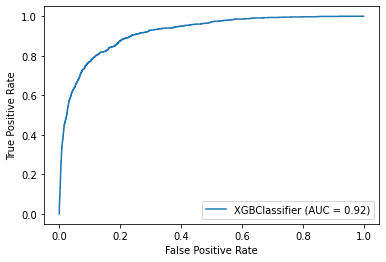

In [49]:
plot_roc_curve(model,x_valid,y_valid)

In [50]:
preds=model.predict(x_valid)

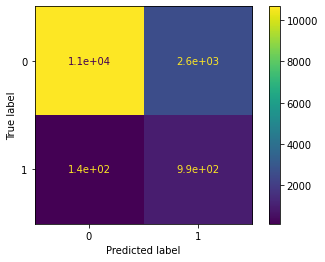

In [51]:
plot_confusion_matrix(model,x_valid,y_valid)

In [52]:
confusion_matrix(y_valid,preds)

array([[10664,  2627],
       [  144,   988]])

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
def objective(trial):
    max_depth=trial.suggest_int('max_depth',6,14,2)
    min_samples_split=trial.suggest_uniform('min_sammples_split',0,0.1)
    n_estimators=trial.suggest_int('n_estimators',100,450,50)
    rfc=RandomForestClassifier(oob_score=True,bootstrap=True,max_depth=max_depth,n_estimators=n_estimators,min_samples_split=min_samples_split,
                              n_jobs=-1)
    rfc.fit(X_train,Y_train)
    predictions=rfc.predict_proba(x_valid)
    predictions=predictions[:,1]
    score=roc_auc_score(y_valid,predictions)
    return score
    
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=120)   


[I 2020-09-13 08:00:40,619] A new study created in memory with name: no-name-c69de5fe-d5ae-459e-8602-0f6f2d907d78
[I 2020-09-13 08:03:14,642] Trial 0 finished with value: 0.8415733979235663 and parameters: {'max_depth': 10, 'min_sammples_split': 0.0655749793997653, 'n_estimators': 450}. Best is trial 0 with value: 0.8415733979235663.
[I 2020-09-13 08:04:40,139] Trial 1 finished with value: 0.8454866839140065 and parameters: {'max_depth': 6, 'min_sammples_split': 0.02342733206846356, 'n_estimators': 250}. Best is trial 1 with value: 0.8454866839140065.
[I 2020-09-13 08:06:39,717] Trial 2 finished with value: 0.8453188254332948 and parameters: {'max_depth': 6, 'min_sammples_split': 0.028286270319078544, 'n_estimators': 350}. Best is trial 1 with value: 0.8454866839140065.
[I 2020-09-13 08:07:11,546] Trial 3 finished with value: 0.8342236158105872 and parameters: {'max_depth': 12, 'min_sammples_split': 0.0877217794726368, 'n_estimators': 100}. Best is trial 1 with value: 0.845486683914006

In [63]:
print(study.best_trial)

FrozenTrial(number=102, value=0.9050880760194537, datetime_start=datetime.datetime(2020, 9, 13, 12, 0, 26, 126849), datetime_complete=datetime.datetime(2020, 9, 13, 12, 3, 57, 721467), params={'max_depth': 14, 'min_sammples_split': 9.322224263611005e-05, 'n_estimators': 400}, distributions={'max_depth': IntUniformDistribution(high=14, low=6, step=2), 'min_sammples_split': UniformDistribution(high=0.1, low=0), 'n_estimators': IntUniformDistribution(high=450, low=100, step=50)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=102, state=TrialState.COMPLETE)


In [64]:
print(study.best_params)

{'max_depth': 14, 'min_sammples_split': 9.322224263611005e-05, 'n_estimators': 400}


In [68]:
rfc=RandomForestClassifier(oob_score=True,bootstrap=True,max_depth=14,n_estimators=250,min_samples_split= 0.00022889066632460697,
                              n_jobs=-1)
rfc.fit(X_train,Y_train)
predictions=rfc.predict(x_valid) 

In [69]:
confusion_matrix(y_valid,predictions)

array([[12538,   753],
       [  461,   671]])

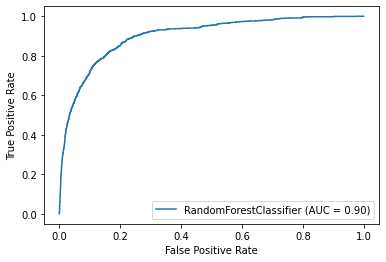

In [70]:
plot_roc_curve(rfc,x_valid,y_valid)

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
with open('ieee-trees.pkl','wb') as f:
  pickle.dump(rfc,f)

In [79]:
clasifier=VotingClassifier(estimators=[('forest',rfc),('xgb',model)],voting='soft',weights=[0.7,0.3])
clasifier.fit(X_train,Y_train)
preds=clasifier.predict_proba(x_valid)
preds=preds[:,1]
score=roc_auc_score(y_valid,preds)

KeyboardInterrupt: ignored

In [73]:
def objective(trial):
  w1=trial.suggest_uniform('w1',0.5,0.9)
  w2=1-w1
  clasifier=VotingClassifier(estimators=[('forest',rfc),('xgb',model)],voting='soft',n_jobs=-1,weights=[w1,w2])
  clasifier.fit(X_train,Y_train)
  preds=clasifier.predict_proba(x_valid)
  preds=preds[:,1]
  score=roc_auc_score(y_valid,preds)
  return score
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=70)


[I 2020-09-13 13:06:55,833] A new study created in memory with name: no-name-da978851-15ae-4cd4-9899-e79db008b8e6


KeyboardInterrupt: ignored